# Sumário

<b>Professor:</b> Henrique A. Cordeiro.
<br>

1. <b>Matemática Financeira:</b>
    * Conceitos básicos de juros;
    * Modelos de regressão.
<br><br>
2. <b>Probabilidade e Estatística:</b>
    * Distribuições de probabilidade;
    * Inferência estatística;
    * Testes de hipóteses;
    * Intervalos de confiança.
<br><br>
3. <b>Noções Gerais de Mercado Financeiro:</b>
    * Tripé da Política Macroeconômica;
    * Definições de inflação;
    * Taxa básica de juros;
    * Órgãos reguladores.
<hr>

# Bibliotecas

Conjunto mínimo de bibliotecas utilizadas na aula. Caso o aluno não possua alguma, deverá instalar antes de executar os códigos a seguir.

In [1]:
import math
import numpy                as     np
import pandas               as     pd
import seaborn              as     sns
import scipy.stats          as     st
import statsmodels.api      as     sm
import matplotlib.pyplot    as     plt
import yahoo_fin.stock_info as     yf # http://theautomatic.net/yahoo_fin-documentation/
# import yahoo_fin.stock_info as     si

# from   pylab                import plt, mpl
from   datetime             import datetime, date
from   statsmodels          import regression

<hr>

# Matemática Financeira

## Conceitos Básicos de Juros

### Introdução

O juros é a remuneração do dinheiro no tempo. Por esta definição, já podemos perceber que a taxa de juros deve sempre estar acompanhada de um horizonte de tempo no qual ela vai ser aplicada. Uma taxa de juros 10% pode ser extremamente alta se for aplicada ao mês, porém uma taxa baixa se for aplicada em uma janela de 5 anos.

Precisamos entender o conceito de juros, não apenas para aprendermos a precificar ativos futuramente, mas também para entender a dinâmica que rege todo o mercado.

Dentro deste racional, o juros pode representar o <b>custo de um empréstimo</b>, no caso de você estar tomando dinheiro emprestado; ou pode representar o <b>retorno do investimento</b>, no caso de você estar emprestando ou aplicando este dinheiro.

Existem duas formas principais de calcular os juros incidentes sobre um empréstimo: <b>Juros Simples</b> ou <b>Juros Compostos</b>.

### Juros Simples

São a forma mais intuitiva de se aplicar os juros sobre um montante inicial. Neste caso, os juros apenas incidem sobre o capital aplicado inicialmente, não havendo a aplicação de <i>juros sobre juros</i>.

Esta forma de cálculo é bastante aplicada em mercados desenvolvidos, tais como o dos Estados Unidos e da União Européia.

A equação que define este tipo de juros é a seguinte:

$$J = C \cdot i \cdot n$$

Onde:
* <b>C:</b> É o capital inicial;
* <b>i:</b> É a taxa de juros aplicada;
* <b>n:</b> É o tempo que esta taxa de juros será aplicada

O <b>Capital</b> é também chamado de PV (<i>Present Value</i> ou Valor Presente), que é o valor financeiro na data atual.
A variável $M$, o <b>Montante</b>, é chamado de FV (<i>Future Value</i> ou Valor Futuro), que é o valor financeiro na data futura que estamos observando, podendo ser a data de fim do investimento ou alguma data intermediária no futuro.

Partindo da equação acima, podemos modificá-la com o objetivo de extrair outras relações entre as mesmas variáveis, como:

Para o <b>Montante</b>:<br>
$M = C + J$<br>
$M = C + C \cdot i \cdot n$<br>
$M = C \cdot (1 + i \cdot n)$<br>
<br>

Para o <b>Capital</b>:<br>
$C = \frac{J}{i \cdot n}$<br>
$C = \frac{M}{1 + i \cdot n}$<br>
<br>

Para a <b>Taxa de Juros</b>:<br>
$i = \frac{J}{C \cdot n}$<br>
<br>

Para o <b>Tempo</b>:<br>
$n = \frac{j}{C \cdot i}$<br>
<br>

Aqui vale ressaltar que é essencial que a <b>periodicidade da taxa</b> esteja na mesma base que a <b>periodicidade do tempo</b>. O que isso quer dizer?

Quer dizer que se tenho uma taxa $i$ expressa <b>ao ano</b> (10% <b>ao ano</b>), então a minha variável $n$ deve estar em <b>anos</b> (2,7 <b>anos</b>).

In [6]:
# Exemplos:

# 1) Fulano aplicou R$15.000 por 7 meses em juros simples, a uma taxa de 2,3% ao mês. Quanto rendeu a aplicação de fulano?
PV = 15000
i = 2.3/100
n = 7

FV = PV * (1 + i * n)
print(f'Exercício 1: R${FV}')

# 2) Fulano agora pegou dinheiro emprestado a uma taxa de 12% ao ano com o banco. Depois de 31 meses, ele teve que pagar
# R$15.000 reais para o banco. Quanto ele pegou emprestado?
FV = 15000
i = 12/100
n = 31/12

PV = FV / (1 + i * n)
print(f'Exercício 2: R${round(PV, 2)}')

Exercício 1: R$17415.0
Exercício 2: R$11450.38


### Juros Compostos

Ao contrário dos juros simples, nos juros compostos existe a incidência de <b>juros sobre juros</b>, ou seja, a taxa no período seguinte vai incidir sobre o principal acrescido dos juros até aquela data. Intuitivamente podemos perceber que os cálculos neste caso serão semelhantes ao caso dos juros simples, porém aqui precisamos fazer as equações de forma <b>exponencial</b>.

Esta forma de juros é mais comumente utilizada em mercado subdesenvolvidos, tais como no Brasil.

A equação que define este tipo de juros é a seguinte:
$$M = C \cdot (1 + i)^n$$

Aqui as variáveis têm o mesmo significado do caso simples! Repare na semelhança entre as equações.

Assim como no caso simples, aqui também podemos manipular algébricamente a equação a fim de isolar cada uma das variáveis.

Para o <b>Capital</b>:<br>
$C = \frac{M}{(1 + i)^n}$<br>
<br>

para os <b>juros</b>:<br>
$J = M - C$<br>
$J = C \cdot (1 + n)^n - C$<br>
$J = C \cdot [(1 + i)^n - 1]$<br>
<br>

Pode-se fazer também para a <b>Taxa</b> e para o <b>Prazo</b>, porém envolve um algebrismo mais chato, então deixo para vocês!

Neste caso dos juros compostos, podemos extrair um outro conceito muito importante, que é o de <b>fator de atualização</b>. Este fator é dado pela seguinte equação:

$$fator = (1 + i)^n$$

E o seu principal objetivo é simplificar o cálculo da correção (atualização) do valor financeiro. Tendo o <b>fator de atualização</b> em mãos, basta multiplicarmos ou dividirmos este fator por qualquer valor financeiro, que automaticamente estaremos levando o valor financeiro ao <i>Future Value</i> ou trazendo o valor financeiro ao <i>Present Value</i>.

In [9]:
# Exemplos:

# 1) Fulano aplicou R$15.000 por 7 meses em juros compostos, a uma taxa de 2,3% ao mês. Quanto rendeu a aplicação de fulano?
PV = 15000
i = 2.3/100
n = 7

FV = PV * (1 + i)**n
print(f'Exercício 1: R${round(FV,2)}')

# 2) Fulano agora pegou dinheiro emprestado a uma taxa de 12% ao ano com o banco. Depois de 31 meses, ele teve que pagar
# R$15.000 reais para o banco. Quanto ele pegou emprestado?
FV = 15000
i = 12/100
n = 31/12

PV = FV / (1 + i)**n
print(f'Exercício 2: R${round(PV, 2)}')

Exercício 1: R$17588.17
Exercício 2: R$11192.95


### Equivalência de Taxas

Anteriormente foi dito que precisamos que a periodicidade da <b>taxa de juros</b> deve estar na mesma base do <b>prazo</b> considerado no cálculo. Desta forma, caso o investidor veja em uma proposta de aplicação uma <b>taxa de X% ao mês</b> e veja um horizonte de investimento de <b>Y anos</b>, como ele deveria fazer para achar a rentabilidade do investimento? Não podemos considerar o <i>X%</i> junto com o <i>Y anos</i>, pois um está em meses e o outro está em anos. Precisamos colocá-los na <b>mesma base</b>.

Para fazer isto é muito simples, vamos ver qual é a conta a ser feita para o caso de <b>juros simples</b> e para o caso de <b>juros compostos</b>.

#### Equivalência em Capitalização Simples

Temos a seguinte relação para converter a taxa a uma peridicidade qualquer que desejarmos:

$$i_{desejada} = i_{original} \cdot \frac{n_{desejado}}{n_{original}}$$

Onde:
* $i_{desejada}$: É a taxa na capitalização que queremos;
* $i_{original}$: É a taxa na capitalização que temos hoje;
* $n_{desejado}$: É o tempo que queremos que nossa taxa esteja;
* $n_{original}$: É o tempo que temos nossa taxa hoje.

Observe como esta equação é intuitiva: estamos basicamente pegando a taxa original e multiplicando pela <b>razão</b> entre ambos os regimes (ambos os diferentes $n$). Faz sentido no âmbito de uma capitalização simples, pois tudo é linear e basedo em produto.

#### Equivalência em Capitalização Composta

Temos a seguinte relação para converter a taxa a uma peridicidade qualquer que desejarmos:

$$i_{desejada} = \bigg[(1 + i_{original})^{\frac{n_{desejado}}{n_{original}}} - 1\bigg]$$

Aqui as variáveis têm o mesmo significado do caso simples.

Repare que a conta é muito semelhante, a diferença é que a <b>razão entre os regimes</b> foi para o <b>expoente</b> da equação.

Uma forma simples de "decorar" esta relação é usando o famoso "<b>quero-tenho</b>", que faz menção à razão da equação, pois é o prazo que eu <b>quero</b> dividido pelo prazo que eu <b>tenho</b>.

In [10]:
# Exemplos

# 1) Tenho uma taxa de 13% ao mês, qual a taxa equivalente ao semestre em regime SIMPLES?

iOriginal = 13/100
nOriginal = 1
nDesejado = 6

iDesejado = iOriginal * nDesejado / nOriginal
print(f'Exercício 1: {round(iDesejado*, 2)}')

Exercício 1: R$0.78


### Equivalência de Regimes

Imagine que você tem a possibilidade de fazer dois investimentos diferentes, você precisa escolher um deles para aplicar o seu capital. Um deles paga uma taxa de juros simples, e o outro paga uma taxa de juros composta. Como podemos fazer para ver a <b>taxa equivalente</b> em alguma das bases, para que possamos comparar a rentabilidade de ambos os investimentos e escolher aquele que se mostre mais rentável?

Vamos fazer um exemplo numérico:

Vamos supor que você pode aplicar R\$1.000,00 em um investimento que te rende 15% <b>ao ano</b> em regime de capitalização <b>simples</b> por 2 <b>anos</b>, ou você pode aplicar R\$1.000,00 em um investimento que te rende 9% <b>ao ano</b> em regime de capitalização <b>composta</b> por 2 <b>anos</b>. Qual a diferença no montante final em cada caso?

* <b>Caso 1:</b><br>
$M = 1000 \cdot (1 + 15\% \cdot 2)$<br>
$M = 1300,00$<br>
<br>
<br>

* <b>Caso 2:</b><br>
$M = 1000 \cdot (1 + 9\%)^2$<br>
$M = 1322,50$<br>
<br>
<br>

Agora podemos perceber que o investimento com juros compostos, <b>neste caso</b>, é mais rentável.

Mas e se quisessemos fazer uma contra-proposta ao nosso acessor. Como podemos fazer para saber qual a taxa em </b>regime simples</b> que vai me dar exatamente o mesmo valor ao final do mesmo período em <b>regime composto</b>?

Basta manipularmos algebricamente as equações acima para cada modalidade!

Se queremos que a <b>taxa mensal composta</b> de $2,0\%$ seja equivalente a uma <b>taxa mensal simples</b> em $3$ anos, precisamos fazer:<br>
$(1 + i_{am})^{n_{am}} = (1 + i_{aa})^{n_{aa}}$<br>
$(1 + i_{am})^12 = (1 + i_{aa})^1$<br>
$i_{aa} = (1 + i_{am})^12 - 1$<br>
$i_{aa} = (1 + 2\%)^12 - 1$<br>
$i_{aa} = 26,82\%$<br>
<br>

$(1 + i_{aa})^{n_{aa}} = (1 + r_{aa} \cdot n_{aa})$<br>
$(1 + i_{aa})^3 = 1 + r_{aa} \cdot 3$<br>
$r_{aa} = \frac{(1 + i_{aa})^3 - 1}{3}$<br>
$r_{aa} = \frac{(1 + 26,82\%)^3 - 1}{3}$<br>
$r_{aa} = 34,66\%$<br>
<br>

$r_{am} = r_{aa} \cdot \frac{1}{12}$<br>
$r_{am} = 34,66\% \cdot \frac{1}{12}$<br>
$r_{am} = 2,89\%$<br>
<br>
<br>

Onde:
* $i_{am}$: Taxa <b>composta</b> mensal;
* $i_{aa}$: Taxa <b>composta</b> anual;
* $r_{am}$: Taxa <b>simples</b> mensal;
* $r_{aa}$: Taxa <b>simples</b> anual.

Desta forma, se fizermos:<br>
$1 + 2,89\% * 36 = 203,99\%$<br>
<br>
$(1 + 2,00\%)^{36} = 203,99\%$<br>
<br>

In [ ]:
# Exemplos

### Taxas Contínuas

Vimos anteriormente dois tipos de taxas: simples e compostas, porém ainda existe um terceiro tipo, que são as <b>taxas contínuas</b>. Este tipo de capitalização é pouco falado e veiculado, pois ele é majoritariamente utilizado para modelos quantitativos de precificação de ativos e derivativos.

Imagine o seguinte, as taxas de juros simples/compostas são capitalizadas de maneira <b>discreta</b>, certo? Em outras palavras, elas existem em momentos de tempo bem específicos. E se eu precisasse que uma taxa existisse para <b>toda a reta real</b>? Ou seja, que a taxa fosse <b>contínua</b>.

Porque eu rpecisaria disso? Pois muitos modelos de apreçamento ou de risco são funções matemáticas contínuas (aproximações da realidade), e essas formulações precisam que todas as variávels que as compõem também sejam contínuas. Desta forma, para modelagem de risco ou precificação de ativos ou derivativos, vamos sempre usar taxas contínuas nos modelos!

Pois bem, qual é a formulação de uma taxa contínua?

$$e^{r \cdot t} = exp(r \cdot t)$$

Onde:
* $e$: É o número neperiano;
* $r$: É  a taxa contínua ao período;
* $t$: É o período.
<br>

E como posso comparar o regime composto ao regime contínuo?

$$(1 + i)^n = e^{r \cdot t}$$

Em que $t$ e $n$ são o prazo de capitalização para cada regime, podendo estar em períodos distintos.

Com a relação acima, podemos obter quaisquer conversões que desejarmos:<br>
$ln(1 + i)^n = ln(e^{r \cdot t})$<br>
$n \cdot ln(1 + i) = r \cdot t$<br>
<br>

Se ambas as taxas e prazos estiverem no mesmo período, vamos ter o caso em que $n = t$, então:<br>
$r = ln(1 + i)$<br>
$e^r = 1 + i$<br>
$i = e^r - 1$<br>
<br>

In [ ]:
# Exemplos

<hr>

## Modelos de Regressão

### Introdução

Os modelos de regressão são extensamente utilizados no Mercado Financeiro, ed várias formas diferentes. Podem ser usados para verificarmos o quanto um ativo se comporta com relação a um outro ativo, ou a um <i>benchmark</i> de mercado, podemos tentar projetar os preços (menos comumente utilizado em aplicações simples e diretas), podemos tentar estimar o risco de uma carteira quebrando este portfólio em diferentes fatores de risco de mercado, podemos calibrar técnicas de otimização de portfólios, entre outras aplicações.

Dos modelos de regressão, é importante conhecermos pelo menos o mais básico, que é o MQO (Mínimos Quadrados Ordinários), ou em seu nome original OLS (<i>Ordinary Least Squares</i>). Este modelo consiste em uma regressão simples, um dos modelos mais comumente utilizados em aplicações ordinárias. Vamos falar deste modelo brevemente aqui, mas já adianto que vale a pena aprofundar um pouco mais em outros modelos de regressão - como regressão polinomial, ou regressão logística.

### O que é a Regressão Linear <i>OLS</i>?

<p>A regressão linear <i>OLS</i> (<i>Ordinary Least Squares</i>) é simplesmente um problema de minimização de uma função objetivo. Em outras palavras, é um processo iterativo onde busca-se uma reta com melhor <i>fitting</i> possível aos dados através da minimização dos resíduos quadráticos. Ou seja, minimiza-se a soma do quadrado da distância ortogonal entre cada amostra à reta de melhor <i>fitting</i>. Matemáticamente temos:</p>

$$y_t=\alpha+\beta x_t+\epsilon_t$$

<p>Onde $\epsilon_t$ é um termo de erro na regressão, pois sabemos que nenhuma regressão com dados reais irá <i>fittar</i> com 100% de perfeição os dados. Devemos adicionar uma tolerância de precisão ao algoritmo. Temos que, para a regressão ser considerada útil e não espúria, precisamos ter normalidade nos resíduos, visto que estamos trabalhando com séries normalmente distribuídas, então $u_t \sim N(0,\sigma^2)$.</p>

<p>Vamos usar a seguinte notação na demonstração a seguir:</p>

- $y_t$ denota o valor observado no instante $t$;

- $\hat{y}_t$ denota o valor ajustado pela reta de regressão;

- $\hat{u}_t$ denota o resíduo $y_t - \hat{y}_t$.

<p>Algoritmo do MQO (Mínimos Quadrados Ordinários), mais conhecido na bibliografia como <i>OLS</i> (<i>Ordinary Least Squares</i>):</p>

* Minimize $\hat{u}_1^2 + \hat{u}_2^2 + \hat{u}_3^2 + \hat{u}_4^2 + \hat{u}_5^2$, ou minimize $\sum_{t=1}^{5}\hat{u}_t^2$, que é conhecido como <b>Soma dos Quadrados dos Resíduos</b> (<b>SQR</b> ou em inglês <b>RSS</b>);

* Mas quem é $\hat{u}_t$? É, por definição, a diferença entre o valor observado e o valor previsto pela reta de regressão, $y_t - \hat{y}_t$;

* Portanto, minimizar $\sum\big(y_t-\hat{y}_t\big)^2$ é equivalente a minimizar $\sum\hat{u}_t^2$ em relação a $\hat{\alpha}$ e $\hat{\beta}$;

* Mas $\hat{y}_t = \hat{\alpha}+\hat{\beta}x_t$, então:

$$L=\sum_{t=1}^{T}\big(y_t-\hat{y}_t\big)^2\sum_{t=1}^{T}\big(y_t-\hat{\alpha}-\hat{\beta}x_t\big)^2$$

* Queremos minimizar $L$ em relação a $\hat{\alpha}$ e $\hat{\beta}$, portanto, diferenciando $L$ em relação a $\hat{\alpha}$ e $\hat{\beta}$ temos:

$$\frac{\partial L}{\partial \hat{\alpha}}=-2\sum_{t=1}^{T}\big(y_t-\hat{\alpha}-\hat{\beta}x_t\big)=0$$

$$\frac{\partial L}{\partial \hat{\beta}}=-2\sum_{t=1}^{T}x_t\big(y_t-\hat{\alpha}-\hat{\beta}x_t\big)=0$$

* Desenvolvendo a primeira equação diferencial:

$$\sum_{t=1}^{T}\big(y_t-\hat{\alpha}-\hat{\beta}x_t\big)=0 \iff \sum_{t=1}^{T}y_t-T\hat{\alpha}-\hat{\beta}\sum_{t=1}^{T}x_t=0$$

* Mas $\sum_{t=1}^{T}y_t=T\bar{y}$ e $\sum_{t=1}^{T}x_t=T\bar{x}$;

* Podemos então escrever:

$$T\bar{y}-T\hat{\alpha}-T\hat{\beta}\bar{x}=0 \text{    or    } \bar{y}-\hat{\alpha}-\hat{\beta}\bar{x}=0$$

* Pela segunda equação diferencial, temos:

$$\sum_{t=1}^{T}x_t\big(y_t-\hat{\alpha}-\hat{\beta}x_t\big)=0$$

* Unindo as relações acima, temos $\hat{\alpha}=\bar{y}-\hat{\beta}x_t$;

$$\sum_{t=1}^{T}x_t\big(y_t-\bar{y}+\hat{\beta}\bar{x}-\hat{\beta}x_t\big)=0$$

$$\sum_{t=1}^{T}x_ty_t-\bar{y}\sum_{t=1}^{T}x_t+\hat{\beta}\bar{x}\sum_{t=1}^{T}x_t-\hat{\beta}\sum_{t=1}^{T}x_t^2=0$$

$$\sum_{t=1}^{T}x_ty_t-T\bar{x}\bar{y}+\hat{\beta}T\bar{x}^2-\hat{\beta}\sum_{t=1}^{T}x_t^2=0$$

* Rearranjando os termos para $\hat{\beta}$:

$$\hat{\beta}\bigg(T\bar{x}^2-\sum_{t=1}^{T}x_t^2\bigg)=T\bar{x}\bar{y}-\sum_{t=1}^{T}x_ty_t$$

* Temos então:

$$\hat{\beta}=\frac{\sum_{t=1}{T}x_ty_t-T\bar{x}\bar{y}}{\sum_{t=1}{T}x_t^2-T\bar{x}^2}=\frac{\sum_{t=1}^{T}\big(x_t-\bar{x}\big)\big(y_t-\bar{y}\big)}{\sum_{t=1}^{T}\big(x_t-\bar{x}\big)^2}=\frac{cov(x_t,y_t)}{var(x_t)}$$

$$\hat{\alpha}=\bar{y}-\hat{\beta}\bar{x}$$

#### Exemplo

In [12]:
# Criando uma função que irá buscar as séries históricas dos ativos aqui utilizados
# Esta busca será feita na base de dados disponibilizada pelo Yahoo Finance através da biblioteca deles.

def get_pricing(ticker, start_date=None, end_date=None, fields=None):
    df = pd.DataFrame()
    
    if ((fields == 'price') | (fields == 'Price')):
        fields = 'close'
    
    if isinstance(ticker, list):
        if start_date == None:
            if end_date == None:
                for i in ticker:
                    aux = yf.get_data(i)
                    if fields != None:
                        aux = aux[[fields]]
                    else:
                        aux = aux[['close']]
                    aux.columns=[i]
                    df = pd.concat([df, aux], axis=1)
            else:
                for i in ticker:
                    aux = yf.get_data(i, end_date=end_date)
                    if fields != None:
                        aux = aux[[fields]]
                    else:
                        aux = aux[['close']]
                    aux.columns=[i]
                    df = pd.concat([df, aux], axis=1)
        else:
            for i in ticker:
                aux = yf.get_data(i, start_date=start_date, end_date=end_date, interval='1d')
                if fields != None:
                    aux = aux[[fields]]
                else:
                    aux = aux[['close']]
                aux.columns=[i]
                df = pd.concat([df, aux],axis=1)
        
    else:
        if start_date == None:
            if end_date == None:
                df = yf.get_data(ticker)
            else:
                df = yf.get_data(ticker, end_date=end_date)
        else:
            df = yf.get_data(ticker, start_date=start_date, end_date=end_date, interval='1d')

        if fields != None:
            df = df[[fields]]

        df = df[['close']]
        df.columns=[ticker]
        
    return df

# Exemplo de chamada da função
inicio = '2014-01-01'
fim = '2015-01-01'
ticker='TSLA'
benchmark = 'SPY'
ativo = get_pricing(ticker, fields='close', start_date=inicio, end_date=fim)
benchmk = get_pricing(benchmark, fields='close', start_date=inicio, end_date=fim)

In [14]:
# ativo.head()
benchmk.head()

,SPY
2014-01-02,182.919998
2014-01-03,182.889999
2014-01-06,182.360001
2014-01-07,183.479996
2014-01-08,183.520004


In [15]:
# Vamos agora calcular os retornos destes ativos e vamos jogar o primeiro elemento fora
r_a = ativo.pct_change()[1:]
r_b = benchmk.pct_change()[1:]

In [17]:
# r_a.head()
r_b.head()

,SPY
2014-01-03,-0.000164
2014-01-06,-0.002898
2014-01-07,0.006142
2014-01-08,0.000218
2014-01-09,0.000654


C:\Users\henri\AppData\Local\Temp\ipykernel_88460\4236659153.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b='True')


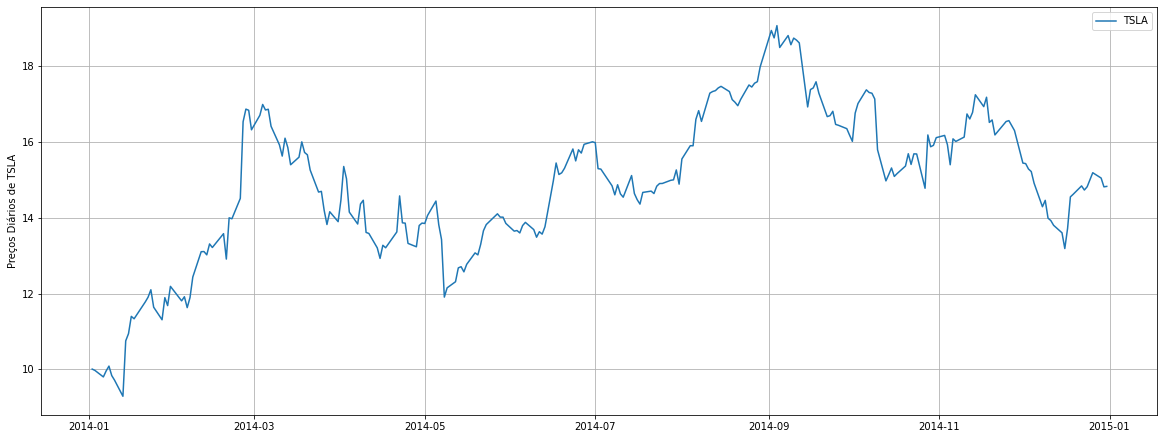

C:\Users\henri\AppData\Local\Temp\ipykernel_88460\4236659153.py:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b='True')


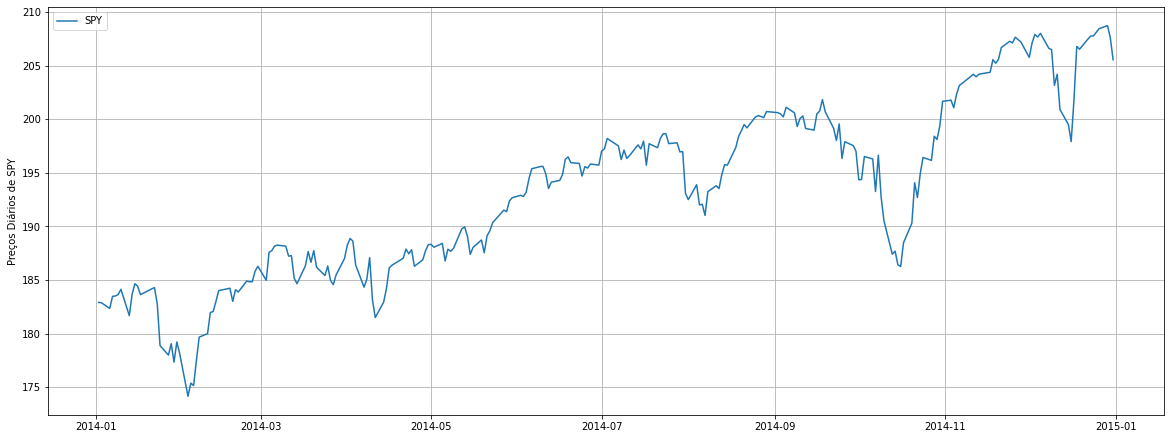

In [19]:
# Plotar ambas as séries temporais de preços para visualização

plt.figure(figsize=(20,7.5))
plt.plot(ativo)
plt.ylabel(f'Preços Diários de {ticker}')
plt.legend([ticker])
plt.grid(b='True')
plt.show();

plt.figure(figsize=(20,7.5))
plt.plot(benchmk)
plt.ylabel(f'Preços Diários de {benchmark}')
plt.legend([benchmark])
plt.grid(b='True')
plt.show();

C:\Users\henri\AppData\Local\Temp\ipykernel_88460\3457865954.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b='True')


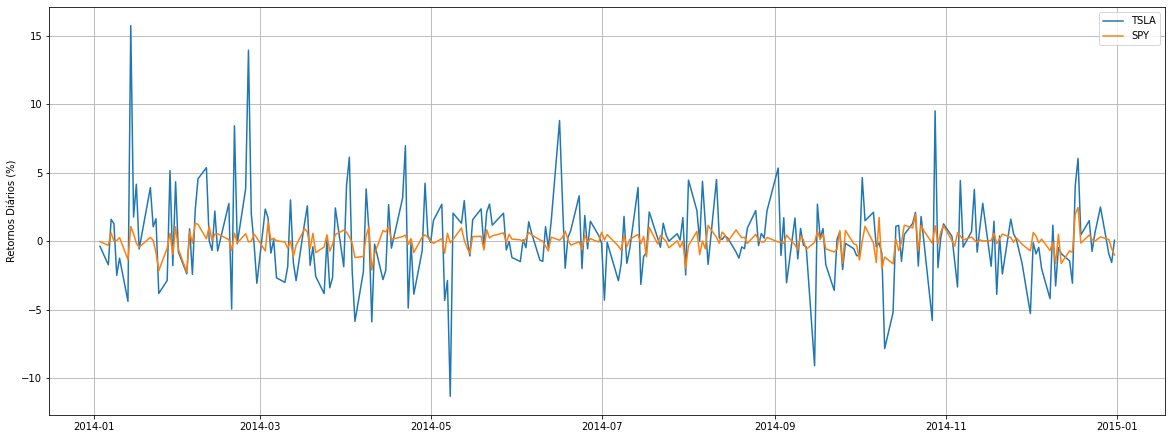

In [20]:
# Plotando ambas as séries temporais de retornos apenas para visualização

plt.figure(figsize=(20,7.5))
plt.plot(r_a*100)
plt.plot(r_b*100)
plt.ylabel('Retornos Diários (%)')
plt.legend([r_a.columns[0], r_b.columns[0]])
plt.grid(b='True')
plt.show();

In [21]:
# Agora vamos executar a regressão linear para estimarmos os parâmetros alfa e beta

X = r_b.values # Pegando apenas os valores, sem os índices (datas)
Y = r_a.values

def linreg(x,y):
    # Adiciona-se uma constante para que possamos "fittar" também um intercepto (que será nosso alfa) no modelo
    # O comando abaixo apenas adiciona uma coluna de 1s nos dados
    x = sm.add_constant(x)
    modelo = regression.linear_model.OLS(y,x).fit()
    # Removendo a constante agora que já estimamos a regressão
    x = x[:, 1]
    return modelo.params[0], modelo.params[1]

alfa, beta = linreg(X,Y)
print('alfa: ' + str(round(alfa, 4)))
print('beta: ' + str(round(beta, 4)))

alfa: 0.0011
beta: 1.9534


In [22]:
# Hipótese nula -> A regressão não é válida
# Com p-value baixo (abaixo de 0,05 usualmente), podemos considerar que a regressão é preditiva

regression.linear_model.OLS(Y,sm.add_constant(X)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     64.79
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           3.43e-14
Time:                        10:58:04   Log-Likelihood:                 549.38
No. Observations:                 251   AIC:                            -1095.
Df Residuals:                     249   BIC:                            -1088.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.002      0.620      0.536      -0.002       0.004
x1             1.9534      0.243      8.049      0.000       1.475       2.431
==============================================================================
Omnibus:                       64.336   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              377.055
Skew:                           0.853   Prob(JB):                     1.33e-82
Kurtosis:                       8.757   Cond. No.                         141.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\henri\AppData\Local\Temp\ipykernel_88460\1889284510.py:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b='True')


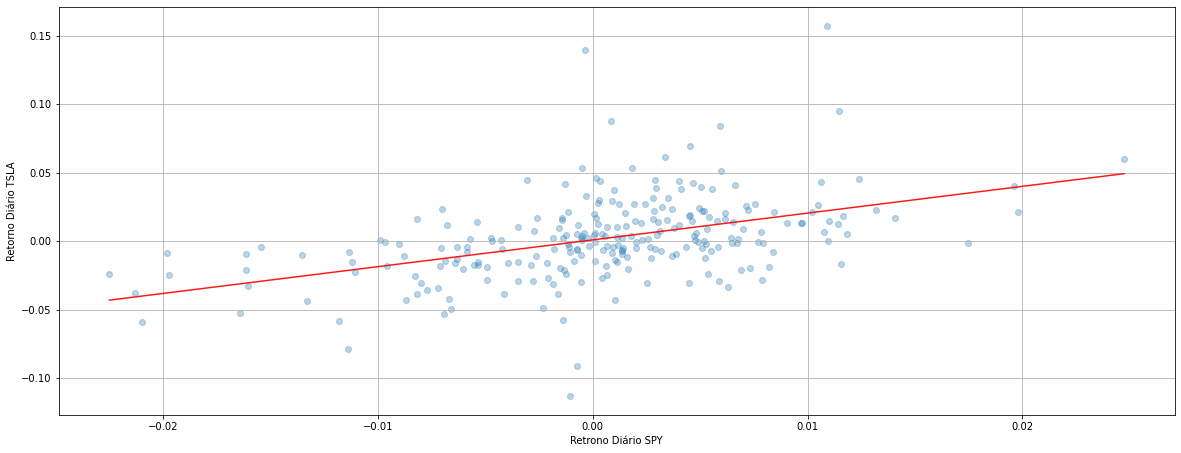

In [23]:
# Vamos plotar o modelo estimado Y = alfa + beta * X para vermos se ele estima bem os retornos dentro da amostra

X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * beta + alfa

plt.figure(figsize=(20,7.5))
plt.scatter(X, Y, alpha=0.3) # Plotando os dados de mercado
plt.xlabel("Retrono Diário "+benchmark)
plt.ylabel("Retorno Diário "+ticker)

# Adicionando a linha de regressão em vermelho
plt.plot(X2, Y_hat, 'r', alpha=0.9)
plt.grid(b='True')
plt.show()

Usando os <b>PREÇOS</b> na regressão, ao invés dos retornos.

alfa: 156.2359
beta: 2.4839


C:\Users\henri\AppData\Local\Temp\ipykernel_88460\1824872983.py:29: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b='True')


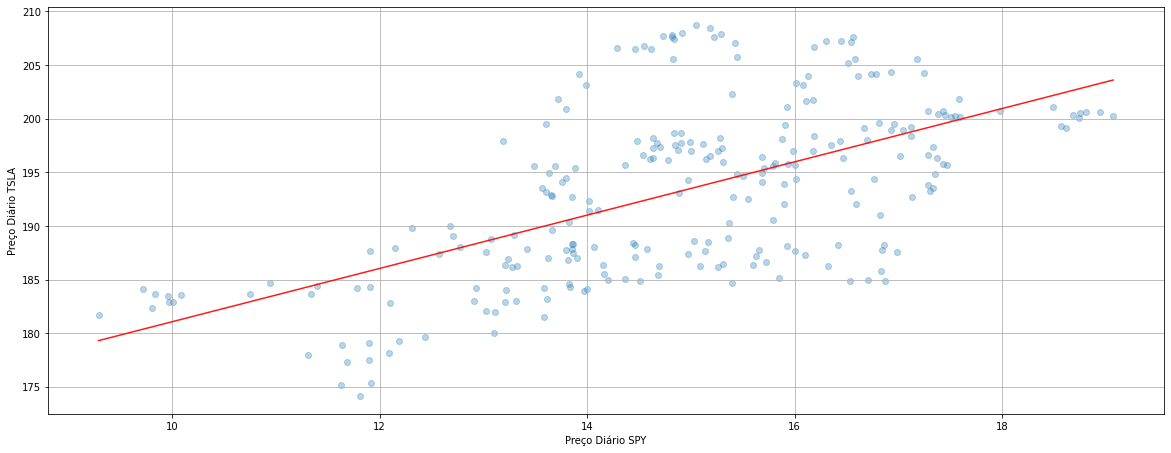

In [24]:
X_preco = ativo.values # Pegando apenas os valores, sem os índices (datas)
Y_preco = benchmk.values

def linreg(x,y):
    # Adiciona-se uma constante para que possamos "fittar" também um intercepto (que será nosso alfa) no modelo
    # O comando abaixo apenas adiciona uma coluna de 1s nos dados
    x = sm.add_constant(x)
    modelo = regression.linear_model.OLS(y,x).fit()
    # Removendo a constante agora que já estimamos a regressão
    x = x[:, 1]
    return modelo.params[0], modelo.params[1]

alfa_preco, beta_preco = linreg(X_preco,Y_preco)
print('alfa: ' + str(round(alfa_preco, 4)))
print('beta: ' + str(round(beta_preco, 4)))

# Vamos plotar o modelo estimado Y = alfa + beta * X para vermos se ele estima bem os retornos dentro da amostra

X2_preco = np.linspace(X_preco.min(), X_preco.max(), 100)
Y_hat_preco = X2_preco * beta_preco + alfa_preco

plt.figure(figsize=(20,7.5))
plt.scatter(X_preco, Y_preco, alpha=0.3) # Plotando os dados de mercado
plt.xlabel("Preço Diário "+benchmark)
plt.ylabel("Preço Diário "+ticker)

# Adicionando a linha de regressão em vermelho
plt.plot(X2_preco, Y_hat_preco, 'r', alpha=0.9)
plt.grid(b='True')
plt.show()

In [25]:
# Hipótese nula -> A regressão não é válida
# Com p-value baixo (abaixo de 0,05 usualmente), podemos considerar que a regressão é preditiva

regression.linear_model.OLS(Y_preco,sm.add_constant(X_preco)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     143.1
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           2.21e-26
Time:                        11:00:29   Log-Likelihood:                -825.33
No. Observations:                 252   AIC:                             1655.
Df Residuals:                     250   BIC:                             1662.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        156.2359      3.118     50.115      0.000     150.096     162.376
x1             2.4839      0.208     11.964      0.000       2.075       2.893
==============================================================================
Omnibus:                        7.829   Durbin-Watson:                   0.042
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                8.137
Skew:                           0.427   Prob(JB):                       0.0171
Kurtosis:                       2.785   Cond. No.                         116.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<p>Idealmente queremos que a estatística de <i>Durbin-Watson</i> (Teste de autocorrelação)  esteja o mais próximo de 2 possível. O valor deste teste pode variar entre 0 e 4, e valores entre [0, 2) significam uma autocorrelação positiva, e valores entre (2, 4] significam uma autocorrelação negativa.</p>

<p>Na análise técnica, onde busca-se operar em cima de <i>momentum</i> e predições de curtíssimo prazo, a autocorrelação pode ser útil, porém, para a grande maioria dos casos em finanças quantitativas e análise de séries temporais, a autocorrelação é indesejável.</p>

<p>Um dos motivos de ser comum o uso dos retornos, é que eles tendem a eliminar a autocorrelação da série temporal, como pôde ser visto aqui.</p>

### Alguns exemplos de regressão

Podemos usar as funções do <i>Numpy</i> <i>np.polyfit()</i> para encontrar os parâmetros ótimos da nossa regressão, e <i>np.polyval()</i> para calcular a aproximação da regressão, dados os parâmetros de entrada. Estas duas funções geralmente são usadas em conjunto em um aplicação. Para deixar mais claro como usamos elas, vamos aos parâmetros:

| Parâmetro | Descritivo |
|-----------|------------|
| $x$ | Valores da variável <b>independente</b> |
| $y$ | Valores da variável <b>dependente</b> |
| <i>deg</i> | Grau do polinômio para ajustar |
| <i>full</i> | Se <i>True</i>, retorna ifnormações de diagnóstico |
| <i>w</i> | Pesos para aplicar à coordenada $y$ |
| <i>cov</i> | Se <i>True</i>, retorna a matrix de covariância também |
<br>

Vamos fazer um exemplo para uma regressão com <b>polinômio de grau 1</b>:

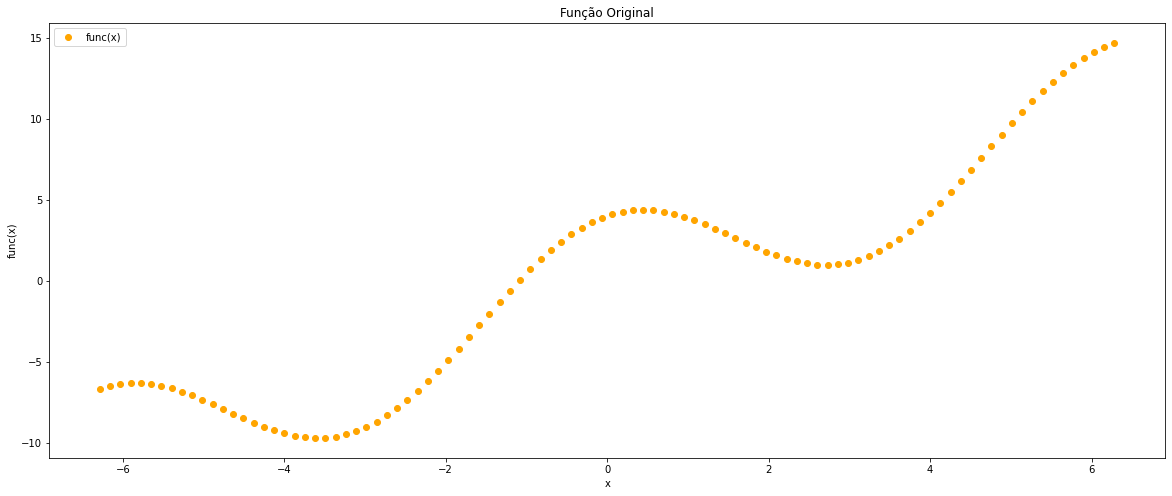

In [26]:
def func(x):
    return 4*np.cos(x) + 1.7 * x

x = np.linspace(-2*np.pi, 2*np.pi, 100)

plt.figure(figsize=(20,8))
plt.scatter(x, func(x), color='orange', label='func(x)')
plt.title('Função Original')
plt.xlabel('x')
plt.ylabel('func(x)')
plt.legend(loc=0)
plt.show()

In [27]:
# Vamos usar a regressão linear simples agora

# Vamos usar um polinômio de primeiro grau na regressão, e retornar o diagnóstico completo
regressao = np.polyfit(x, func(x), deg=1, full=True)
regressao

(array([1.7 , 0.04]),
 array([807.84]),
 2,
 array([1., 1.]),
 2.220446049250313e-14)

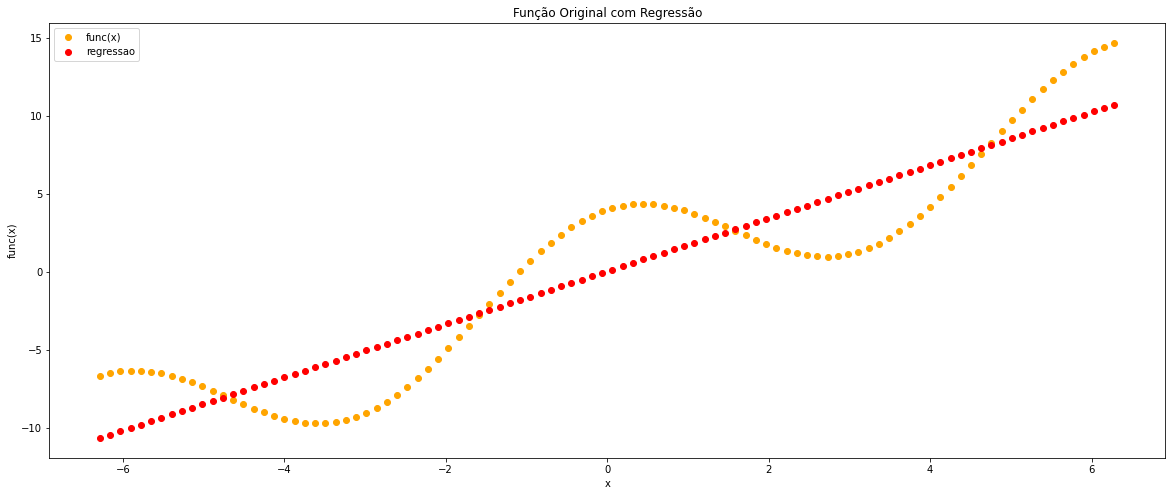

In [28]:
yRegressao = np.polyval(regressao[0], x)

plt.figure(figsize=(20,8))
plt.scatter(x, func(x), color='orange', label='func(x)')
plt.scatter(x, yRegressao, color='red', label='regressao')
plt.title('Função Original com Regressão')
plt.xlabel('x')
plt.ylabel('func(x)')
plt.legend(loc=0)
plt.show()

O que acontece se eu <b>aumentar o grau do polinômio para 5</b>?

In [29]:
# Vamos usar a regressão linear simples agora

# Vamos usar um polinômio de quinto grau na regressão
regressao = np.polyfit(x, func(x), deg=5)
regressao

array([ 1.09536129e-18,  1.77774851e-02,  1.12282109e-16, -5.51267391e-01,
        1.70000000e+00,  1.67415006e+00])

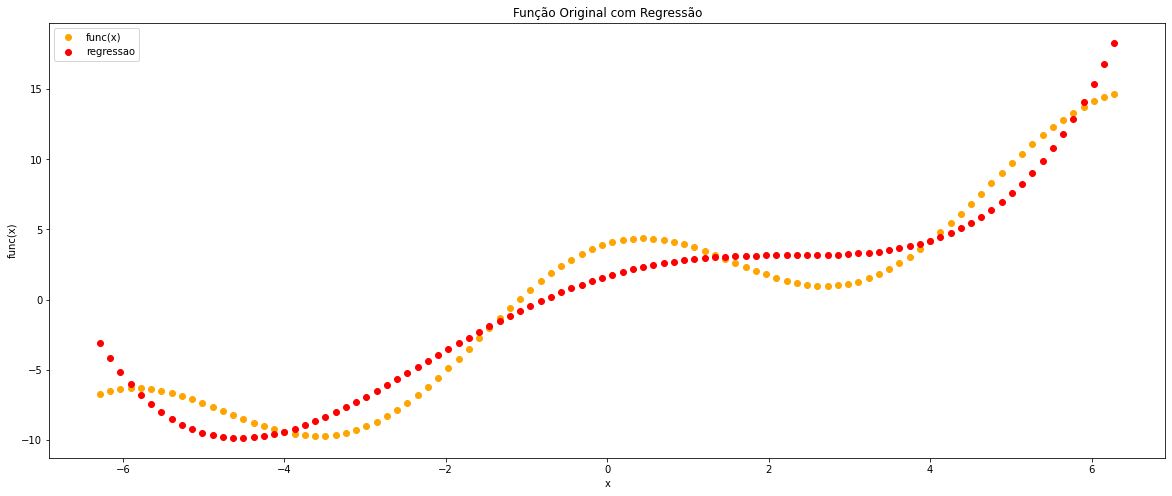

In [30]:
yRegressao = np.polyval(regressao, x)

plt.figure(figsize=(20,8))
plt.scatter(x, func(x), color='orange', label='func(x)')
plt.scatter(x, yRegressao, color='red', label='regressao')
plt.title('Função Original com Regressão')
plt.xlabel('x')
plt.ylabel('func(x)')
plt.legend(loc=0)
plt.show()

O que acontece se eu <b>aumentar o grau do polinômio para 7</b>?

In [31]:
# Vamos usar a regressão linear simples agora

# Vamos usar um polinômio de sétimo grau na regressão
regressao = np.polyfit(x, func(x), deg=7)
regressao

array([ 1.36050277e-18, -1.27409056e-03, -8.13402637e-17,  8.76874715e-02,
        1.59492874e-15, -1.48882961e+00,  1.70000000e+00,  3.47014372e+00])

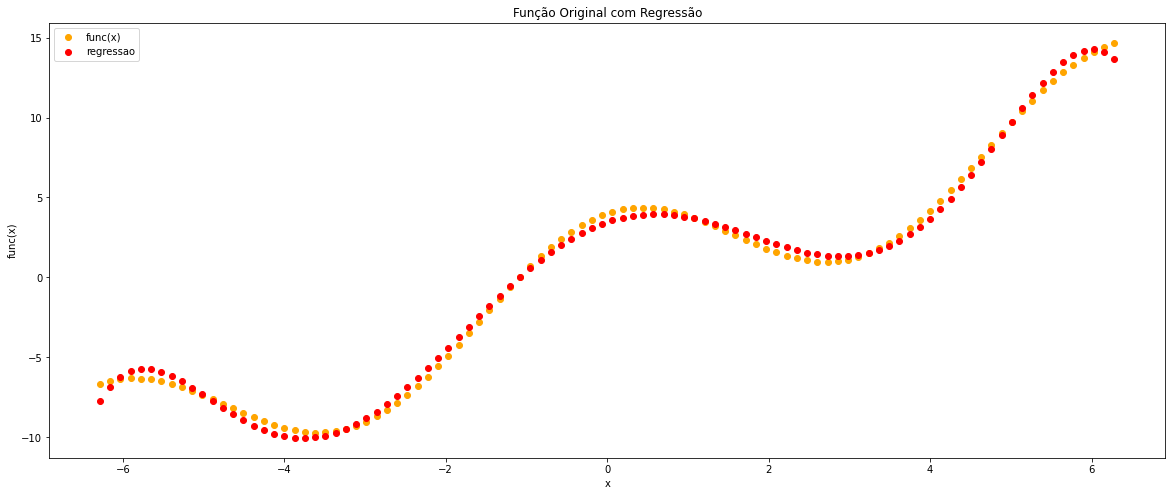

In [32]:
yRegressao = np.polyval(regressao, x)

plt.figure(figsize=(20,8))
plt.scatter(x, func(x), color='orange', label='func(x)')
plt.scatter(x, yRegressao, color='red', label='regressao')
plt.title('Função Original com Regressão')
plt.xlabel('x')
plt.ylabel('func(x)')
plt.legend(loc=0)
plt.show()

Podemos ver que a regressão melhorou bastante. Neste caso, estamos trabalhando com uma função-base (ou seja, a função que gera meus dados originais) como sendo uma função bem comportada, previsível e sem ruído. Neste caso, termos uma melhor aproximação é benéfico pois nos permite ter um grau de previsibilidade grande.

Mas e nos casos onde a nossa função-base tem ruído, e seu processo gerador tem uma componente <b>aleatória relavante</b>?

Nestes casos, se tivermos uma função que se ajusta muito perfeitamente aos nosso dados, podemos perder a capacidade de abstração e extrapolação dessa curva. Ou seja, nosso modelo ficou tão "viciado" nos dados que usamos para ajustá-lo, que fica impossível prever dados futuros que fujam deste padrão observado.

No mercado financeiro, a <b>relação sinal/ruído</b> das séries temporais é enorme (ao contrário de aplicações em enegenharia), então precisamos manter a capacidade de abstração da nossa regressão. Vamos a um exemplo em uma série ruidosa.

In [33]:
xRuido = x + 0.5 * np.random.standard_normal(len(x))
yRuido = func(xRuido) + 0.75 * np.random.standard_normal(len(x))

In [34]:
# Vamos usar a regressão linear simples agora

# Vamos usar um polinômio de sétimo grau na regressão
regressao = np.polyfit(xRuido, yRuido, deg=5)
regressao

array([ 3.84261232e-04,  1.27264454e-02, -1.39329343e-02, -4.19937868e-01,
        1.77537092e+00,  1.20399517e+00])

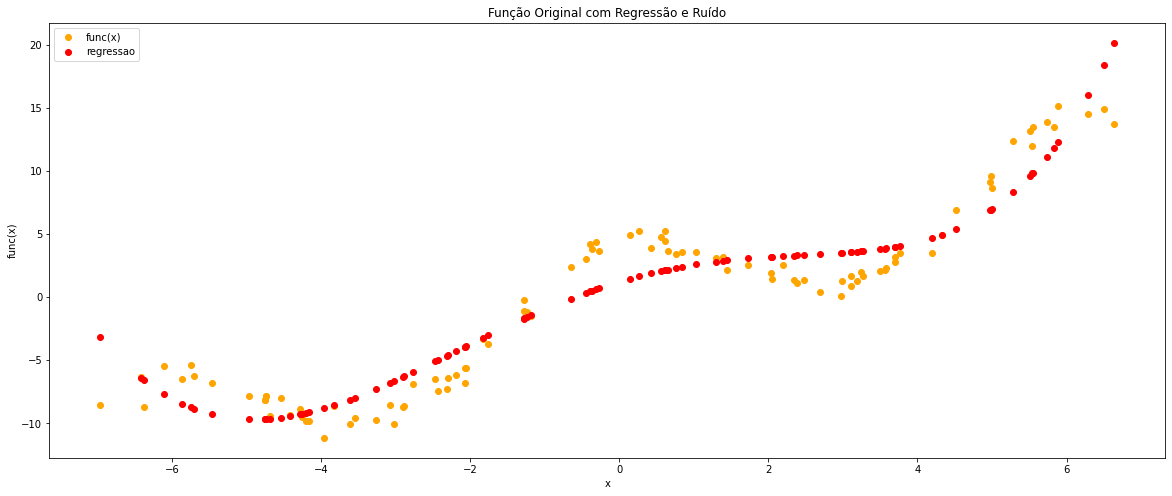

In [35]:
yRegressao = np.polyval(regressao, xRuido)

plt.figure(figsize=(20,8))
plt.scatter(xRuido, yRuido, color='orange', label='func(x)')
plt.scatter(xRuido, yRegressao, color='red', label='regressao')
plt.title('Função Original com Regressão e Ruído')
plt.xlabel('x')
plt.ylabel('func(x)')
plt.legend(loc=0)
plt.show()

In [36]:
# Vamos usar a regressão linear simples agora

# Vamos usar um polinômio de sétimo grau na regressão
regressao = np.polyfit(xRuido, yRuido, deg=1)
regressao

array([ 1.72363244, -0.12895355])

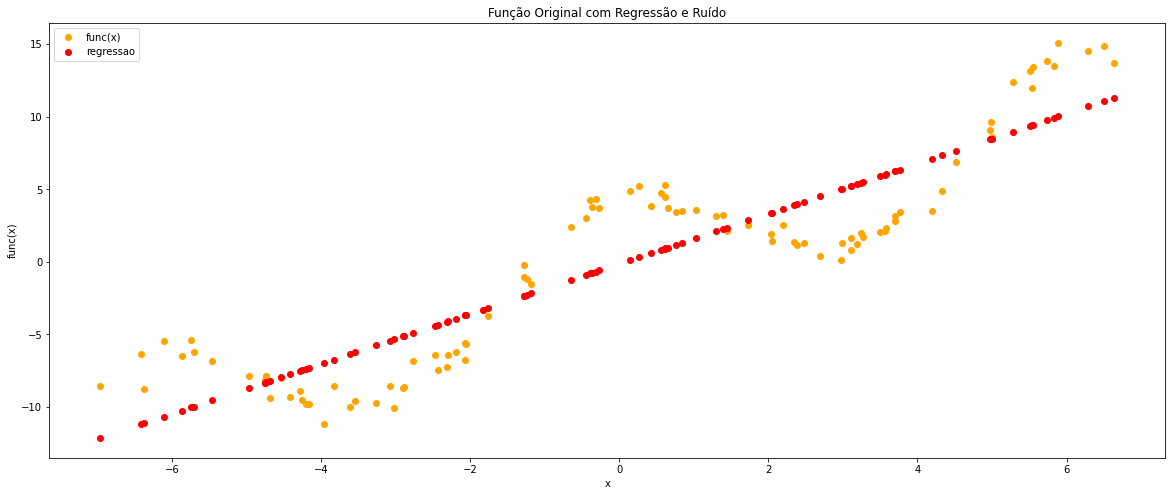

In [37]:
yRegressao = np.polyval(regressao, xRuido)

plt.figure(figsize=(20,8))
plt.scatter(xRuido, yRuido, color='orange', label='func(x)')
plt.scatter(xRuido, yRegressao, color='red', label='regressao')
plt.title('Função Original com Regressão e Ruído')
plt.xlabel('x')
plt.ylabel('func(x)')
plt.legend(loc=0)
plt.show()

### Apêndice

<p>Nesta seção serão esclarecidos alguns conceitos mais genéricos, de forma independente. Algumas dúvidas mais pontuais e que podem fugir um pouco ao tema central da aula, mas que carregam conceitos importantes, serão esclarecidas aqui.</p>

#### Por quê usar Log Retornos ao invés de Retornos?

<p>Os log retornos possuem algumas características estatísticas que usualmente são mais desejáveis quando estamos tratando de séries financeiras de maneira geral. A seguir serão listadas algumas destas características:</p>

- <b>Log-normalidade:</b> Se assumirmos que os preços têm distribuição log-normal, então $log(1 + r_i)$ (sendo $r_i$ o retorno simples) é normalmente distribuído - porque $1+r_i = \frac{p_i}{p_{i-1}} = e^{log\big(\frac{p_i}{p_{i-1}}\big)}$. Esta característica é bastante útil visto que a maior parte da estatística clássica presume normalidade;

- <b>Aproximação aos Retornos Simples:</b> Quando os retornos são bem pequenos (o que é comum para séries de curta duração), a seguinte aproximação garante que os log-retornos se aproximem dos retornos simples: $log(1+r) \approx r, r \ll 1$;

- <b>Aditividade Temporal:</b> Imagine uma sequência ordenada (série temporal) de $n$ <i>trades</i>. Uma estatística muito importante são os retornos compostos, ou seja, o retorno corrente da sequência de <i>trades</i> ao longo do tempo. Este cálculo é dado pela seguinte conta: $\prod_{i}(1+r_i)$. Esta equação não é interessante de se trabalhar computacionalmente e, além disto, sabemos que o produto de variáveis normalmente distribuídas não é uma variável normal. Ao invés de fazermos este cálculo, podemos nos beneficiar do fato de a soma de variáveis normalmente distribuídas serem normais (<b>apenas quando todas as variáveis são descorrelacionadas</b>), o que se torna útil quando temos em mãos a seguinte equação $log(1+r_i) = log\big(\frac{p_i}{p_{i-1}}\big) = log(p_i) - log(p_{i-1})$. Logo, calcular os retornos compostos desta forma nos dá retornos normalmente distribuídos. Desta forma, temos um algoritmo bem simples para calcular os retornos compostos normalmente distribuídos utilizando os log-retornos: $\sum_{i}log(1+r_i) = log(1+r_1) + log(1+r_2) + \dots + log(1+r_n)=log(p_n) - log(p_0)$. Assim, o retorno composto sobre $n$ períodos é simplesmente a diferença em log entre os períodos inicial e final. Em termos de complexidade computacional, reduzimos um problema de complexidade $O(n)$ multiplicações para um problema $O(1)$ somas. Além disto, esta soma é útil quando os retornos divergem da normalidade, pois, como nos diz o Teorema do Limite Central, a média amostral desta soma irá convergir para a normalidade (<b>presumindo que o primeiro e o segundo momentos são finitos</b>);

- <b>Facilidade no Cálculo Diferencial:</b> Do cálculo, se ignorarmos a constante de integração, temos: $e^x=\int e^xdx=\frac{d}{dx}e^x=e^x$. Esta identidade é muito útil, visto que grande parte da matemática financeira padrão é construída sobre processos estocásticos de tempo contínuo - que dependem altamente na integração e na diferenciação;

- <b>Estabilidade Numérica:</b> A adição de números pequenos é numéricamente estável, porém o produto de números muito pequenos pode acarretar em <i>underflow</i> aritmético - ou seja, o resultado da multiplicação tem mais casas decimais do que a precisão da <i>CPU</i>.

<p>Existem, porém, alguns estudos que apontam desvantagens no uso dos log-retornos, tais como: [<i>Comparing Security Returns is Harder than You Think: Problems with Logarithmic Returns</i>] (https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1549328) e [<i>Quant Nugget 2: Linear vs. Compounded Returns – Common Pitfalls in Portfolio Management</i>] (https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1586656).</p>

<hr>

# Probabilidade e Estatística

## Distribuições de Probabilidade

### Introdução

As distribuições de probabilidade são um conceito crucial para o completo entendimento das modelagens utilizadas no Mercado Financeiro. Em geral, no Mercado Financeiro, temos duas abordagens principais: a abordagem matemática, que busca simplificar os problemas com premissas e chegar em uma equação que aproxima o preço do ativo (por exemplo, a equação de <i>Black & Scholes</i>); outra abordagem é a estatística, onde usamos conceitos como <i>Monte Carlo</i> e outros para buscarmos precificar estes mesmos ativos.

Aqui, vou buscar explorar como as distribuições de probabilidade, são aplicadas para modelar e entender o comportamentoo dos mercados financeiros - sem entrar na modelagem de fato, focando mais na probabilidade. Desde a modelagem dos retornos dos ativos (suposição de normalidade dos retornos) até a previsão de eventos de mercado raros e significativos, as distribuições de probabilidade fornecem a base para a análise quantitativa e a tomada de decisões informadas.

Esta seção não apenas tentará fornecer uma compreesão teórica das distribuições de probabilidade, mas também terá <i>insights</i> práticos sobre como esses conceitos são empregados no dia-a-dia dos mercados financeiros.

Primeiramente, vamos pontuar as regras básicas que todas as funções de probabilidade devem respeitar, tanto no caso discreto quanto no caso contínuo:

Para o caso discreto:<br><br>
$0 \leq P(X = x) \leq 1$<br><br>
$P(X = x) \geq 0$<br><br>
$\sum_{i=1}^\infty P(X = x_i) = 1$<br><br>
$P(a \leq X \leq b) = \sum_{x=a}^{x=b}P(X = x)$<br><br>
<br>

Para o caso contínuo:<br><br>
$p(x) \geq 0, \forall x \in \mathbb{R}$<br><br>
$\int_{-\infty}^{\infty} p(x) \,dx = 1$<br><br>
$P(a \leq X \leq b) = \int_{a}^{b} p(x) \,dx$<br><br>
<br>

<b>Algumas regras básicas de probabilidade:</b><br>
<br>
$P(A ∪ B) = P(A) + P(B) - P(A ∩ B)$<br><br>
$P(A | B) = \frac{P(A ∩ B)}{P(B)}$<br><br>
$P(A ∩ B) = P(A)P(B) \rightarrow$ Se os eventos forem independentes!<br><br>
$P(A | B)P(B) = P(B | A)P(A)$<br><br>

Para a Regra de <i>Bayes</i>, vamos dar mais contexto:

Assuma que $\{B_1, B_2, ..., B_k\}$ é uma partição de $S$, tal que $P(B_i) > 0$, para todo $i = 1, 2, ..., k$. Então

$$P(B_j | A) = \frac{P(A | B_j) \cdot P(B_j)}{\sum_{i=1}^kP(A | B_i) \cdot P(B_i)}$$
<br>

Agora vamos fazer um exemplo da Regra de <i>Bayes</i>:

<i>Um fusível eletrônico é produzido por cinco linhas de produção em uma operação de fabricação. Os fusíveis são caros, bastante confiáveis e são enviados aos fornecedores em lotes de 100 unidades. Como o teste é destrutivo, a maioria dos compradores dos fusíveis testa apenas um pequeno número de fusíveis antes de decidir aceitar ou rejeitar lotes de fusíveis recebidos. Todas as cinco linhas de produção fabricam fusíveis na mesma taxa e normalmente produzem apenas 2% de fusíveis defeituosos, que são dispersos aleatoriamente na saída. Infelizmente, a linha de produção 1 sofreu dificuldades mecânicas e produziu 5% de defeituosos durante o mês de março. Essa situação se tornou conhecida pelo fabricante após os fusíveis terem sido enviados. Um cliente recebeu um lote produzido em março e testou três fusíveis. Um falhou. Qual é a probabilidade de que o lote tenha sido produzido na linha 1? Qual é a probabilidade de que o lote tenha vindo de uma das outras quatro linhas?</i>

<b>Resolução:</b>

Seja $B$ o evento que um fusível tenha sido <i>tirado da linha 1</i> e seja $A$ o evento que o fusível estava <i>defeituoso</i>. Desta forma, podemos escrever o seguinte:<br><br>
$P(B) = 0.2$<br><br>
$P(A|B) = 3 \cdot (0.05) \cdot(0.95)^2 = 0.135375 \rightarrow$<br><br> Isto vem de uma binomial, pois ou o fusível está queimado ou não está, logo, usamos $n\cdot p \cdot (1-p)$<br>

De forma similar, temos que:<br><br>
$P(\overline{B}) = 0.8$<br><br>
$P(A|\overline{B}) = 3 \cdot (0.02) \cdot (0.98)^2 = 0.057624$<br><br>

Estas probabilidades condicionais foram fáceis de calcular usando as relações que vimos acima. Usando a Lei da Probabilidade Total, temos:<br><br>
$P(A) = P(A|B) \cdot P(B) + P(A|\overline{B}) \cdot P(\overline{B})$<br><br>
$P(A) = (0.135375) \cdot (0.2) + (0.057624) \cdot (0.8) = 0.0731742$<br><br>

E finalmente podemos calcular a probabilidade desejada:<br><br>
$P(B|A) = \frac{P(B ∩ A)}{P(A)} =\frac{ P(A|B) \cdot P(B)}{P(A)} = \frac{(0.135375) \cdot (0.2)}{0.0731742} = 0.37$<br><br>

E...<br><br>
$P(\overline{B}|A) = 1 - P(B|A) = 1 - 0.37 = 0.63$<br><br>

Por fim, vamos falar de esperança e variância. A esperança é como se fosse a média ponderada das probabilidades - podemos enxergá-la como sendo o "centro de massa" da nossa distribuição de probabilidade. Matemáticamente temos:<br>

$$E[X] = \sum x \cdot P(X = x) \rightarrow \textrm{Caso discreto}$$
$$E[X] = \int xp(x) dx \rightarrow \textrm{Caso contínuo}$$

A variância é uma medida de dispersão dos dados, e para calcular ela podemos partir da esperança calculada acima. Para a variância, temos:<br>

$$V[X] = \sigma^2 = E[(X - E[X])^2] = E[X^2] - E[X]^2$$
Onde:<br><br>
$E[X^2]=\sum x^2P(X=x)$

### Distribuição de <i>Poisson</i>

A distribuição de <i>Poisson</i> é utilizada para modelar problemas que são baseados em <b>taxas</b> de ocorrência. Ou seja, se o seu problema pode ser definido como "quantidade de erros por página do livro", ou "número de partículas radioativas que decaem em um dado intervalo de tempo", etc.

Sua equação é dada pela seguinte função:<br>
$$p(y) = \frac{\lambda^y}{y!} \cdot e^{-\lambda}$$

Dada a natureza desta distribuição, ela é muito utilizada em finanças quantitativas no contexto de modelar <i>jumps</i> nas simulações. Os <i>jumps</i> (pulos) são eventos que ocorrem aleatóriamente com uma dada taxa de ocorrência, e eles representam as crises e períodos de <i>stress</i> nas nossas simulações, pois estes eventos têm uma taxa de ocorrência relativamente fácil de modelar, e uma característica aleatória.

Porém, para entender melhor o uso desta distribuição, vamos a um exemplo:

<i>Suponha que um sistema aleatório de patrulha policial seja desenvolvido de forma que um policial de patrulha possa visitar um determinado local Y = 0, 1, 2, 3, ... vezes por período de meia hora, com cada local sendo visitado em média uma vez por período de tempo. Suponha que Y possua, aproximadamente, uma distribuição de probabilidade de Poisson. Calcule a probabilidade de o policial de patrulha não visitar um determinado local durante um período de meia hora. Qual é a probabilidade de ser visitado uma vez? Duas vezes? Pelo menos uma vez?</i>

<b>Resolução:</b>

O período de tempo entre visitas é de meia hora, e o número médio de visitas por período de meia hora é 1, logo, $\lambda = 1$ <b>caso estejamos trabalhando na resulução de 30minutos</b>.<br><br>
$p(y) = \frac{(1)^ye^{-1}}{y!} = \frac{e^{-1}}{y!}, y = 0, 1, 2, ...$<br><br>

O evento que nos diz que uma localização foi perdida pela patrulha em um período de 30 minutos corresponde a $Y = 0$, e:<br><br>
$P(Y = 0) = p(0) = \frac{e^{-1}}{0!} = e^{-1} = 0.368$<br><br>

De forma similar,<br><br>
$p(1) = \frac{e^{-1}}{1!} = e^{-1} = 0.368$<br><br>

E<br><br>
$p(2) = \frac{e^{-1}}{2!} = \frac{e^{-1}}{2} = 0.184$<br><br>

Desta forma, a probabilidade que o local seja visitado <b>pelo menos 1x</b> é o evento $Y \geq 1$, então:<br><br>
$P(Y \geq 1) = \sum_{y=1}^{\infty}p(y) = 1 - p(0) = 1 - e^{-1} = 0.632$<br><br>

### Distribuição Normal

A distribuição de probabilidade contínua mais amplamente usada é a distribuição normal, uma distribuição com a forma de sino (<i>bell shape</i>). Esta distribuição é talvez a mais importante (em termos de aplicações práticas) de todas, para se começar a entender os modelos mais avançados. Claro que os modelos mais aperfeiçoados usam variações como a <i>t-student</i> ou a <i>chi-quadrado</i>, porém entendendo a distribuição normal, podemos entender estas outras com maior facilidade - até porque algumas são generalizações ou variações da própria normal.

Sua equação é dada pela seguinte equação:<br>
$$p(y) = \frac{1}{\sigma \cdot \sqrt{2\pi}} \cdot e^{-(y - \mu)^2 \big/ (2 \cdot \sigma^2)}$$

A distribuição normal, como foi mostrado brevemente na aula de séries temporais, é usada para gerar o ruído branco e, consequêntemente, o passeio aleatório. Esta distribuição é usada diretamente nas simulações que fazemos, pois partimos da suposição de que os retornos dos ativos seguem uma distribuição normal - porém isto é uma premissa falha, pois na prática eventos de cauda, ou seja, eventos extremos, acontecem com uma frequência muito maior do que a normal seria capaz de prever.

Sabendo disso, como os preços dos ativos têm embutidos os riscos daqueles ativo, então podemos já perceber de cara que a distribuição normal subestima os riscos do ativo, ou seja, na prática o ativo é mais arriscado (em geral) do que no modelo.

Porém, para entender melhor o uso desta distribuição, vamos a um exemplo:

<i>As notas de desempenho para um exame de entrada na faculdade são distribuídas normalmente com média 75 e desvio padrão 10. Que fração das notas está entre 80 e 90?</i>

Vamos calcular a distância que o intervalo está da média, em termos de quantidades de desvios padrões, fazendo:<br><br>
$z = \frac{y - \mu}{\sigma}$<br><br>
$z_1 = \frac{80 - 75}{10} = 0.5$<br><br>
$z_2 = \frac{90 - 75}{10} = 1.5$<br><br>

Logo, olhando a tabela da normal, temos:<br><br>
$fração = N(0.5) - N(1.5) = 0.3085 - 0.0668 = 0.2417$<br><br>

<hr>

## Inferência Estatística

### Introdução

A inferência é necessária quando não conseguimos conhecer toda a população de amostras que temos em mãos. Essa incapacidade pode vir tanto pelo fato de os testes necessários serem <b>destrutivos</b>, quanto o número de amostras ser extremamente grande, quanto ao fato de ter um custo enorme trabalharmos todas as amostras.

Pensemos no exemplo do IBGE. Tudo que ele faz tende a ser uma inferência estatística, porque é tanto inviável você entrevistar todas as famílias do Brasil quanto é custoso. Além disso, podemos ter uma estimativa suficientemente boa da população como um todo se fizermos <b>amostragens "corretas"</b> na nossa população de dados.

<hr>

## Testes de Hipótese

Referência à aula da Ada.

<hr>

## Intervalos de Confiança

Referência à aula da Ada.

<hr>

# Noções Gerais de Mercado Financeiro

## Tripé da Política Macroeconômica

### Introdução

A macroeconomia é uma ramificação que estuda o comportamento, a estrutura e a decisões da economia. Neste guarda-chuvas, são estudados os fenômenos agregados - tais como o PIB (<i>GDP - Gross Domestic Product</i>), a inflação, o desemprego, a balança comercial, as políticas monetárias e fiscais, etc. Na macroeconomia, não apenas buscamos entender como esses elementos interagem, mas também como as políticas e ferramentas governamentais podem ser usadas para influenciar estes indicadores.

A gestão de uma economia visa atender às necessidades de bens e serviços da sociedade e atingir determinados objetivos sociais e macroeconômicos, como pleno emprego, distribuição de riqueza, estabilidade de preços e crescimento econômico. Para tanto, o governo atua na economia por meio de políticas econômicas, identificadas pela política monetária, política fiscal e política cambial, principalmente.

Os instrumentos das políticas econômicas são mais eficientes quando aplicados em mercados financeiros mais desenvolvidos. Em mercados menos evoluídos, cuja pequena dimensão e alta concentração de riquezas limitam os efeitos desses instrumentos econômicos, o governo costuma promover maior intervenção no mercado, por meio, principalmente, da fixação das taxas de juros, controle direto do crédito e subsídio ao setor produtivo.

O <b>tripé da política macroeconômica</b> é caracterizado pelos seguintes pilares:
* <b>Política fiscal:</b> Busca-se um superávit primário, um equilíbrio fiscal (diferença entre gastos e receitas);
* <b>Política monetária:</b> Busca-se usar taxas básicas de juros, por exemplo, para controle inflacionário e de expansão do consumo;
* <b>Política cambial:</b> Modelo de câmbio fixo ou câmbio flutuante, equilíbrio externo, etc.

### Política Monetária

A política monetária enfatiza sua atuação sobre os meios de pagamento, títulos públicos e taxas de juros, modificando o custo e o nível de oferta do crédito. A política monetária é geralmente executada pelo <b>Banco Central</b> de cada país, o qual possui poderes e competências próprias para controlar a quantidade de moeda na economia.

O Banco Central administra a política monetária por intermédio dos seguintes instrumentos clássicos de controle monetário:

* Recolhimentos compulsórios;
* Operações de mercado aberto - <i>open market</i>;
* Políticas de redesconto bancário e  empréstimos de liquidez.

Uma política monetária é <i>expansionista</i> quando eleva a liquidez da economia, injetando maior volume de recursos nos mercados e elevando, em consequência, os meios de pagamentos. Com isso, são dinamizados o consumo e o investimento agregados com reflexos positivos sobre a expansão da atividade econômica. Essa situação é geralmente adotada em momentos de retração do nível da economia, em que se produz um hiato deflacionário.

Por outro lado, uma política monetária é <i>restritiva</i> quando as autoridades monetárias promovem reduções dos meios de pagamento da economia, retraindo a demanda agregada (consumo e investimento)e a atividade econômica. As medidas restritivas são tomadas sempre que o crescimento da demanda e dos investimentos empresariais se situarem acima da capacidade da oferta de moeda da economia, visando anular os efeitos de um hiato inflacionário. Essa política visa, em essência, restringir a oferta de crédito e elevar seu custo de forma a adequar o sonsumo e o investimento agregados à oferta monetária da economia.

#### Recolhimento de Compulsórios

Os recolhimentos de compulsórios representam o percentual incidente sobre os depósitos captados pelos bancos (bancos comerciais, múltiplos e caixas econômicas) que devem ser colocados à disposição do Banco Central. É um instrumento de controle monetário bastante eficiente, já que atua diretamente sobre os meios de pagamento através do multiplicador bancário. Os depósitos compulsórios podem incidir não somente sobre os depósitos a vista dos bancos, mas, também, sobre os diferentes tipos de depósitos a prazo e depósitos de poupança.

<hr>
<i>O multiplicador bancário, ou multiplicador monetário ou, ainda, "efeito multiplicador do crédito" corresponde à relação entre oferta de moeda e base monetária existente em determinado momento no sistema econômico. Traduz a capacidade dos bancos de ampliar a base monetária através do crédito.</i>

<i>Quanto maior for o encaixe obrigatório ou o depósito compulsório (reservas compulsórias definidas pelo Banco Central), menor será o multiplicador bancário.</i>

<hr>

[*Polêmica*](http://blog.kanitz.com.br/multiplicador-bancario-engodo/)

<hr>

O compulsório sobre os recursos dos bancos é adotado em quase todas as economias do mundo. Tem por objetivo principal controlar a solvência dos bancos e o patrimônio de seus depositantes. Este instrumento de política monetária influi diretamente sobre o volume de dinheiro na economia, bem como sobre a oferta do crédito e as taxas de juros praticadas.

<i>Exemplo:</i>
O Boletim do Banco Central de 2015 revela um recolhimento obrigatório de 44% sobre os recursos à vista (dinheiro em conta-corrente), 20% sobre depósitos à prazo e 20% sobre depósitos de poupança.

Sempre que as autoridades monetárias alterarem as taxas de recolhimento compulsório, é modificado o multiplicador bancário e, consequentemente, os meios de pagamento da economia, determinando uma expansão ou retração da atividade econômica. Uma redução das taxas desses depósitos, por exemplo, libera recursos para a atividade econômica, aumentando o fluxo dos meios de pagamento e reduzindo o custo do crédito. Dessa forma, o volume requerido de depósito compulsório pode afetar toda a atividade da economia.

Ao contrário, medidas monetárias restritivas podem ser acionadas por elevações nos depósitos compulsórios. Com maior volume de recursos esterilizados no Banco Central, a atividade econômica retrai-se, reduzindo a demanda agregada.

<hr>
<i>Maior o recolhimento compulsório, menor o volume de dinheiro disponível na economia e maior é a taxa de juros cobrada pelos bancos nos empréstimos.</i>

<i>Recolhimento compulsório menor libera mais recursos na economia, elevando a oferta do dinheiro e reduzindo, em consequência, a taxa de juros cobrada.</i>
<hr>

#### Operações de Mercado Aberto - <i>Open Market</i>

As operações de mercado aberto (<i>open market</i>) funcionam como um instrumento bastante ágil de política monetária a fim de melhor regular o fluxo monetário da economia e influenciar os níveis das taxas de juros a curto prazo.

Em termos de política monetária, a grande contribuição das operações de mercado aberto centra-se em seu maior dinamismo e flexibilidade, podendo com isso produzir, de forma mais eficiente e rápida, os resultados almejados. Isso se explica, principalmente, pelo caráter de controle mais permanente da liquidez do sistema econômico, comparativamente aos outros instrumentos de política monetária (redesconto, depósitos compulsórios etc.), os quais não se adaptam com a mesma agilidade às variações diárias que ocorrem normalmente nas reservas monetárias na economia.

<hr>

[*Exemplo 1*](https://forbes.com.br/forbes-money/2021/03/entenda-como-o-banco-central-do-japao-tornou-se-acionista-majoritario-de-todas-as-empresas-listadas-em-toquio/)

<hr>

Primariamente, essas operações são fundamentadas por meio da compra e venda de títulos da dívida pública no mercado, processadas pelo Banco Central na qualidade de agente monetário do governo. O mecanismo de funcionamento desse insturmento é relativamente simples. Com vistas, por exemplo, em uma expansão no volume dos meios de pagamento da economia, de forma a elevar sua liquidez e reduzir as taxas de juros, as autoridades monetárias intervêm no mercado, resgatando (adquirindo) títulos públicos em poder dos agentes econômicos. De modo contrário, ao desejar limitar a oferta monetária (reduzir a liquidez do mercado) e, ao mesmo tempo, elevar as taxas de juros vigentes a curto prazo, a postura assumida é de emitir e colocar em circulação novos títulos da dívida pública.

<hr>

[*Exemplo 2*](https://www.businessinsider.com/quantitative-easing#:~:text=Quantitative%20Easing%20(QE)%20is%20a,and%20results%20in%20economic%20growth.)

<hr>

Podem ser relacionados os seguintes principais objetivos possíveis de ser alcançados pelas operações de mercado aberto:

* Controle diário do volume de oferta de moeda, adequando a liquidez da economia à programação monetária do governo;

* Manipulação das taxas de juros a curto prazo (não só em decorrência do volume da oferta da moeda, como também das taxas pagas pelas autoridades monetárias em suas operações com títulos públicos negociados);

* Permite que as instituições utilizem suas disponibilidades monetárias ociosas em diversas operações financeiras (aplicações) de curto e curtíssimo prazos;

* Criação de liquidez para os títulos públicos, motivando as negociações com todos os demais títulos.

#### Redesconto Bancário e Empréstimo de Liquidez

O Banco Central costuma realizar diversos empréstimos, conhecidos por <i>empréstimos de assistência à liquidez</i>, às instituições financeiras, visando equilibrar suas necessidades de caixa diante de um aumento mais acentuado de demanda por recursos de seus depositantes. A taxa de juros cobrada pelo Banco Central nessas operações é denominada de <b>taxa de redesconto</b>.

A definição da taxa de redesconto por parte das autoridades monetárias age, ao mesmo tempo, sobre o nível da liquidez monetária da economia e, também, sobre as taxas de juros praticadas pelos bancos. Se a taxa cobrada no redesconto for inferior àquela adotada pelo mercado, as instituições financeiras são incentivadas a elevar a oferta de crédito, apurando maiores lucros pelo diferencial entre a taxa cobrada dos depositantes e a taxa de redesconto paga ao Banco Central. Ao se elevar a taxa de redesconto, reduz-se, em consequência, a oferta de crédito no mercado, incentivando um aumento das taxas de juros.

O instrumento de redesconto é muito utilizado como forma de incentivar a atividade econômica, elevando a oferta de empréstimos a longo prazo para detemrinados setores estratégicos ao desenvolvimento econômico. No entanto, essa política no Brasil vem sendo mais adotada como um auxílio financeiro aos bancos que passam eventualmente por dificuldades financeiras, colaborando para o saneamento de seu caixa.

#### Resumo

| Ação                            | Expansionista (<i>Maior Liquidez</i>)                                         | Restritiva (<i>Menor Liquidez</i>)                                           |
|---------------------------------|--------------------------------------------------------------------------|-------------------------------------------------------------------------|
| Depósitos Compulsórios          | Diminui o percentual de recolhimento                                     | Aumenta o percentual de recolhimento                                    |
| Mercado Aberto (<i>Open Market</i>)  | Governo injeta dinheiro na economia adquirindo títulos públicos          | Governo retira dinheiro da economia vendendo títulos públicos           |
| Política de Redesconto Bancário | Autoridade monetária reduz a taxa de juros e aumenta o prazo da operação | Autoridade monetária aumenta a taxa de juro e reduz o prazo da operação |

#### Objetivos

- Crescimento da renda e emprego;
- Estabilização dos preços;
- Equilíbrio das contas externas;
- Distribuição justa da renda.

#### Principais instrumentos

- Taxa de juros;
- Gasto público;
- Impostos;
- Taxa de câmbio.

#### Tipos de Políticas Macroeconômicas

- Expansionistas (Ex: redução dos juros, aumento do gasto público, redução de impostos, etc);
    -> Redução de encargos -> estimula consumo -> aumento de produção;

-  Contracionistas (Ex: aumento dos juros, redução do gasto público, aumento de impostos, etc);
    -> Aumento de encargos -> desestimula consumo -> redução de produção;

-  Neutras (Ex: aumento do gasto público/aumento de impostos, etc).

<hr>

## Definições de Inflação

### Introdução

O conceito de inflação precisa estar claro para todos, para que a sua influência na economia como um todo possa ser compreendida. Este fenômeno é bastante comum em países subdesenvolvidos, como o Brasil, portanto muitas das análises de investimento levam em consideração a influência deste efeito nas decisões finais de alocação.

### Dinâmica e Definição

É importante que se entenda a relação entre o volume de moedas na economia e a oferta de bens e serviços e, além disso, como que esses fatores são influenciados pelas políticas monetárias supracitadas. A economia procura sempre manter um equilíbrio através principalmente do volume de moedas disponível e a oferta de bens e serviços. Se a disponibilidade de moeda em poder das pessoas se elevar, esse aumento provoca uma maior disposição dos agentes para consumir, forçando um equilíbrio da economia pela alta dos preços.

Ao não se estabelecer um acréscimo na oferta de bens e serviços para atender ao crescimento da demanda (equilíbrio entre oferta e procura), o excesso de consumo pode causar falta de bens suficientes para atender a maior demanda. Nesse ponto, os preços tendem a se elevar, forçando também uma alta nos índices gerais de preços da economia: os consumidores irão dispender mais recursos para adquirir a mesma quantidade de bens e serviços. Esse é o fenômeno da <b>inflação</b>, entendida como uma elevação persistente nos preços da ampla maioria dos bens e serviços, fazendo subir os índices gerais de preços da economia. A taxa de inflação representa o aumento percentual verificado nos níveis gerais de preços.

O fenômeno inverso à inflação é a <b>deflação</b>, que surge em caso de queda nos índices gerais de preços da economia. Esse fenômeno ocorre geralmente quando a oferta de bens e serviços for superior à demanda. Nesse caso, produtores/vendedores são forçados a reduzir os preços para atrair os consumidores e reduzir o excesso de oferta.

No caso da deflação, os agentes dispendem menos dinheiro para adquirir a mesma quantidade de bens e serviços na economia.

No contexto de <b>inflação</b> os consumidores perdem poder de compra. Diante de uma alta generalizada dos preços, um número menor de pessoas estará em condições de manter seu padrão de consumo, consumindo um volume menor de bens e serviços. Em situação de <b>deflação</b> o produtor/vendedor perde margem de lucro, pois é forçado a oferecer seus produtos a um preço menor.

A estabilidade da economia passa necessariamente pelo equilíbrio entre o volume disponível de moeda em poder das pessoas e a oferta de bens e serviços. Um excesso de dinheiro em circulação na economia gerado por uma emissão exagerada de papel-moeda para cobrir os gastos da União, sem a consequente geração de riqueza e aumento da oferta de bens e serviços, é a causa mais provável de inflação. O controle das variações nos índices gerais de preços é processado, principalmente pela adoção de políticas econômicas e atuação do Banco Central - como vimos acima.

### Índices de Preços - Indicadores da Inflação

Cada economia mede sua inflação através de um índice geral de preços, que acompanha as variações de preços de um grupo selecionado de bens e serviços (chamado de <i>cesta</i>), e seguindo uma determinada metodologia de apuração. Nesse caso, a taxa de inflação é reconhecida como o percentual médio de aumento dos preços dessa cesta selecionada de bens e serviços em certo período.

No Brasil, entre outros, são divulgados e utilizados pelo mercado os seguintes índices de preços: IGP-M/FGV (Índice Geral de Preços do Mercado), IGP-Di/FGV (Índice Geral de Preços - Disponibilidade Interna), IPC-Fipe/USP (Índice de Preços ao Consumidor), IPA/FGV (Índice de Preços por Atacado), INPC/Fundação IBGE (Índice Nacional de Preços ao Consumidor) etc.

Vamos definir estes índices um pouco mais detalhadamente:

- <b>IGP - <i>Índice Geral de Preços</i>:</b> É publicado todo mês pela <i>Fundação Getulio Vargas</i>, é uma medida da inflação brasileira. Apesar de ser bastante utilizado no mercado financeiro, o <i>IGP</i> não é a medida oficial da inflação no Brasil. O índice que mede a inflação brasileira é o <i>IPCA</i> - <i>Índice de Preços ao Consumidor Ampliado</i>. O <i>IGP</i> é uma medida ponderada do <i>IPA</i>, do <i>IPC</i> e do <i>INCC</i> (<i>Índice Nacional de Preços da Contrução Civil</i>). Este índice ainda se subdivide em três versões;

- <b>IGP-DI:</b> Abrange as variações de preços verificadas entre o primeiro e o último dia do mês de referência;

- <b>IGP-M:</b> Abrange as variações de preços verificadas entre o dia 21 do mês anterior ao de referência e o dia 20 do mês de referência;

- <b>IGP-10:</b> Abrange as avriações de preços verificadas entre o dia 11 do mês anterior ao de referência e o dia 10 do mês de referência;

- <b>IPC - <i>Índice de Preços ao Consumidor</i>:</b> Reflete a variação média de preços de um conjunto de bens e serviços no mercado de varejo. É publicado pela <i>FGV</i> e também pela <i>FIPE</i> (<i>Fundação Instituto de Pesquisas Econômicas/USP</i>);

- <b>INPC e IPCA:</b> São apurados todo mês pelo <i>IBGE</i>. Estes dois índices medem a variação de preços de um conjunto de produtos e serviços consumidos pelas famílias. Comparam os preços verificados nos 30 dias do período de referência com os 30 dias do período-base. A população-objeto do <i>INPC</i> são famílias com rendimentos menais entre 1 e 8 salários-mínimos. O <i>IPCA</i> considera em sua metodologia de cálculo famílias com rendimentos mensais entre 1 e 40 salários-mínimos.

Como podemos ver, o Brasil é um país que adora medir sua iflação em vários nichos e públicos distintos. Nos <i>USA</i> temos um indicador de inflação - o <i>CPI</i> (<i>Consumer Price Index</i>).

Cada um destes índices têm uma importância diferente para a economia brasileira.

O crescimento da economia e a inflação não devem seguir a mesma tendência, sob pena de provocar desequilíbrio na atividade econômica. Os investidores internacionais (bancos, fundos de pensão e fundos de investimentos, empresas multinacionais etc.) priorizam países que apresentam estáveis indicativos de crescimento econômico e baixos níveis de inflação.

Em uma visão mais clássica, a inflação pode ser causada pelo lado dos custos, pelo lado da demanda, ou por uma conjugaçãod esses dois fatores. A <b>inflação de custos</b> é um processo de elevação das taxas de juros, salários, câmbio etc. que determina um acréscimo nos custos de produção. A <b>inflação de demanda</b>, por outro lado, é determinada pela expansão dos meios de pagamento acima da capacidade de crescimento apresentada pela economia, produzindo um excesso de recursos (rendimentos) em oferta na economia. Diante de maior pressão sobre a demanda de bens e serviços, ocorrem aumentos nos salários e preços em geral, dando origem a um processo inflacionário.

Em geral, quando uma economia dá sinais de elevação de seus índices gerais de preços, as autoridades monetárias atuam sobre a atividade econômica de forma a manter o equilíbrio dos preços. Essa atuação sobre a economia é feita geralmente pelo aumento dos juros, tornando mais oneroso e desencorajadores todos os gastos de empresas e consumidores e provocando desaceleração da economia.

Para o combate à inflação, as autoridades monetárias podem também decretar intervenções sobre o câmbio e controles sobre os preços e salários, reduzindo a capacidade de negociação (*barganha*) de certos agentes, como sindicatoes e grandes empresas.

### Curiosidade - A Crise de 2008

A título de curiosidade, vamos ver como a Crise do <i>Subprime</i> (Crise de 2008) afetou o Brasil e seus indicadores econômicos.

<b><i>Timeline</i> da Crise:</b>

- <b>Janeiro/2007:</b> Atingido pela crise, o <i>Countrywide Home Loans</i>, instituição financeira do setor de imóveis, é adquirido pelo <i>Bank of America</i>;

- <b>Fevereiro/2007:</b> O Governo da Inglaterra nacionaliza o Banco <i>Northen Rock</i>;

- <b>Março/2007:</b> O <i>JP Morgan</i> adquire, com a ajuda do Banco Central americano (<i>FED</i>), o Banco de Investimento <i>Bear Sterns</i>;

- <b>Setembro/2007:</b> O Tesouro dos <i>USA</i> assume o controle das empresas de hipoteca <i>Freddie Mac</i> e <i>Fannie Mae</i>;

- <b>Setembro/2008:</b> O Banco de Investimento <i>Merril Lynch</i> é vendido com urgência para o <i>Bank of America</i>;

- <b>Setembro/2008:</b> O Governo dos <i>USA</i> nacionaliza a seguradora <i>American International Group</i> (<i>AIG</i>);

- <b>Setembro/2008:</b> O <i>JP Morgan</i> compra, com a ajuda do Governo, o <i>Washington Mutual</i>;

- <b>Setembro/2008:</b> O Banco <i>Bradford & Bingley</i> é estatizado na Grã-Bretanha;

- <b>Outubro/2008:</b> O <i>Wells Fargo</i> adquire o Banco <i>Wachovia</i>;

- <b>Outubro/2008:</b> O Congresso dos <i>USA</i> aprova pacote de socorro financeiro às instituições financeiras no montante de US\$ 700 bilhões;

- <b>Outubro/2008:</b> Os Bancos Centrais dos <i>USA</i>, Europa e Inglaterra, em ação coordenada decidem cortar as taxas de juros visando conter a desaceleração da economia.

Mas e no Brasil? O que aconteceu?

Para o Brasil podemos apontar as principais consequências da crise:

- Falta de crédito. Com a crise internacional, os bancos, em todo o mundo, tornaram-se mais cautelosos, diminuindo o volume de empréstimos e elevando as taxas de juros cobradas. Essa situação pode interferir na capacidade de crescimento das empresas brasileiras e, também, nas empresas estrangeiras que planejam investir no Brasil;

- As Bolsas de Valores sofreram fortes quedas no ano de 2008 e elevado bastante sua volatilidade. A desvalorização das ações afeta os investidores pela formação de perdas e, também, as empresas em sua busca de fontes de financiamento;

- A valorização verificada no Dólar americano em relação ao Real brasileiro promove um encarecimento das importações, podendo alimentar a inflação na economia. Por outro lado, a queda do Real diante do Dólar traz benefícios aos exportadores, tornando nossos produtos mais competitivos em preços.

<hr>

[*Curiosidade*](https://www.cnnbrasil.com.br/business/em-quanto-tempo-a-bolsa-se-recuperara-na-crise-de-2008-demorou-2307-dias/#:~:text=Na%20crise%20de%202008%2C%20demorou%202.307%20dias,-Bolsa%20despencou%2040&text=O%20tombo%20do%20Ibovespa%2C%20principal,Paulo%2C%20continua%20assustando%20os%20investidores.&text=Outras%20crises%2C%20por%C3%A9m%2C%20evidenciam%20que,se%20recupera%20com%20o%20tempo.)

[*Referência inflação*](https://www.ibge.gov.br/explica/inflacao.php)

[*Histórico IPCA*](https://www.idinheiro.com.br/tabelas/tabela-ipca/)

[*Histórico IPCA download*](https://www.ibge.gov.br/estatisticas/economicas/precos-e-custos/9256-indice-nacional-de-precos-ao-consumidor-amplo.html?t=series-historicas&utm_source=landing&utm_medium=explica&utm_campaign=inflacao#plano-real-mes)

### Taxa Nominal e Taxa Efetiva

A taxa real representa o encargo (ou receita) financeiro, calculado livre dos efeitos inflacionários. A utilização de taxas reais no mercado financeiro permite que se apure quanto se ganhou (ou perdeu) verdadeiramente, sem a interferência das variações verificadas nos preços.

A conhecida formulação de *Fischer* permite que se apurem de uma taxa de juros os efeitos da inflação, sendo obtida pela relação:

$$i_{efetiva} = [(1 + i_{real}) \cdot (1 + i_{Inflação})] - 1$$

Onde:

- $i_{efetiva}$: Taxa efetiva de juros que incorpora uma expectativa de inflação (ou taxa operante);

- $i_{real}$: Taxa real de juros, depurada dos efeitos inflacionários;

- $i_{inflação}$: Taxa de inflação, considerada por um índice de preços.

Em outras palavras.

A **taxa nominal** de juros contempla os efeitos da inflação. Ela representa o valor que será pago ao final do período analisado.

Em contratos como empréstimos, ela é calculada levando em consideração, além da inflação, o *spread* comercial da operação e o risco de crédito do tomador.

A **taxa real** de juros não tem o efeito inflacionário, por isso ela tende a ser menor que a taxa nominal. Ela representa o quanto de fato será valorizado acima da inflação.

A taxa de inflação pode ser dada pela diferença entre as taxas de juros real e nominal.

$$(1 + i_N) = (1 + i_{Infl}) \cdot (1 + i_R)$$

Sendo:

- $i_N$ = taxa nominal
- $i_{Infl}$ = taxa de inflação
- $i_R$ = taxa real

<hr>

## Taxa Básica de Juros

### Introdução

A Taxa Meta Selic, também é conhecida como taxa básica de juros. É a taxa oficial de juros brasileira, definida pelo Conselho Monetário Nacional (CMN) no Comitê de Política Monetária (COPOM), que ocorre a cada 45 dias.


Além disso, ela foi criada no Brasil em março de 1999 e é considerada a taxa que ajuda controlar a inflação. Quando a inflação cresce, o governo aumenta a taxa Meta Selic. Com isso, ele induz a redução do consumo (uma vez que vale mais a pena manter e aplicar seu dinheiro do que gastá-lo comprando bens de consumo). Com a redução de demanda, os preços tendem a cair e, portanto, a inflação tende a cair.

[Histórico da meta de inflação](https://www.bcb.gov.br/controleinflacao/historicometas)

[Taxa SELIC](https://www.bcb.gov.br/controleinflacao/taxaselic)

A taxa básica de juros da economia brasileira é definida pela taxa SELIC. Esta taxa, fixada pelo Banco Central, é a taxa de referência no mercado financeiro, exercendo influências diretas sobre o volume da dívida pública, oferta de crédito, nível de inflação, entre outros indicadores econômicos importantes.

A SELIC é usada também para estabelecer o custo do dinheiro nas operações de mercado aberto com títulos públicos (<i>open market</i>). A taxa média dessas operações em um dia é conhecida no mercado por Taxa Média SELIC (TMS). Assim, a taxa conhecida por SELIC é uma taca "<i>over</i>", válida para dias úteis, e definida para operações realizadas com títulos públicos de emissão do Governo Federal, e registrados no SIstema Especial de Liquidação e Custódia (Selic).

A taxa SELIC é admitida como a de mais baixo risco no mercado financeiro nacional, sendo referência para as demais taxas de juros do mercado. O Banco Central do Brasil, através do COPOM - Comitê de Política Monetária - fixa a taxa SELIC regularmente. Todo dia, ainda é divulgada a taxa média diária praticada nas operações com títulos públicos.

A metodologia de cálculo da taxa média diária adotada pelo Banco Central é a seguinte:

$$SELIC_{media} = \bigg[\bigg(\frac{\sum_{j=1}^n F_j + V_j}{\sum_{j=1}^n V_j}\bigg)^{252}\bigg] - 1$$

Onde:

- $F_j$: É o fator diário da taxa de juros de cada operação;

- $V_j$: Valor de cada operação;

- $252$: Número de dias úteis anuais definido pelo Banco Central.

Por orientação do BACEN, a taxa SELIC é expressa em termos anuais (taxa ao ano *over* - a.a.o.), fixando-se o ano em 252 dias úteis. Desta forma, a descapitalização da SELIC para dia útil, ou sua capitalização para ano *over* é feita como vimos na aula passada:

$$SELIC_{du} = (1 + SELIC_{a.a.o.})^{\frac{1}{du}} - 1$$

Onde:

- $SELIC_{du}$: Taxa por dia útil;

- $SELIC_{a.a.o.}$: Taxa ao ano *over*;

- $du$: Número de dias úteis (em geral $du = 252$).

### Desmembrando a Taxa SELIC

A taxa SELIC de um determinado período pode ser decomposta em duas partes: taxa real de juros e taxa de inflação. A taxa real, por seu lado, pode também cobrir a taxa livre de risco (taxa pura) e o risco da ocnjuntura (risco da economia). Assim, a taxa SELIC é composta da seguinte maneira:

$$SELIC = [(1 + i_{REAL}) \cdot (1+i_{INFLACAO})] - 1$$

Onde:

- $i_{REAL}$: É a taxa real de juros;

- $i_{INFLACAO}$: É a taxa de inflação.

Como:

$$i_{REAL} = [(1 + i_{PURA}) \cdot (1 + i_{RISCO})] - 1$$

Onde:

- $i_{PURA}$: É a taxa livre de risco da economia;

- $i_{RISCO}$: É o risco mínimo da economia.

Podemos, então, apresentar a taxa SELIC como a capitalização de seus diversos componentes:

$$SELIC = [(1 + i_{PURA}) \cdot (1 + i_{RISCO}) \cdot (1 + i_{INFLACAO})] - 1$$

- NETO ASSAF, Alexandre. Matemática Financeira e suas Aplicações, Editora Atlas, 12ªedição, 2012.
- Menezes, Marcio de. Matemática Financeira .IesdeBrasil, 2009.
- [IBGE Explica: Inflação](https://www.ibge.gov.br/explica/inflacao.php)
- [Banco Central: O que é inflação](https://www.bcb.gov.br/controleinflacao/oqueinflacao)
- [Histórico Taxa de juros](https://www.bcb.gov.br/controleinflacao/historicotaxasjuros)

### Prática

A ideia aqui é investigarmos um pouco sobre as relações que existem (sem um formalismo matemático/estatístico grande) entre as variáveis de mercado e as variáveis macroeconômicas.

<hr>

## Órgãos Reguladores

### Introdução

Mercado financeiro é o espaço onde ocorrem negociações de instrumentos ou produtos financeiros como: títulos, moedas, ações, derivativos e mercadorias. Um mercado financeiro pode ser geral ou especializado.
Cada país possui seu próprio mercado, embora seja possível ocorrer participação externa (inter-mercados).

--------
<b>Curiosidade</b>: <i>O que é Bull e bear market?</i>

As expressões <i>bull market</i> e <i>bear market</i> representam tendências opostas do mercado financeiro. <i>Bull Market</i> é um mercado de alta, enquanto que <i>Bear Market</i> é um mercado de baixa. Elas comumente se referem a estados da bolsa de valores, mas podem ser usadas para qualquer tipo de ativo ou mercado.

Você sabe de onde vieram essa expressão? 
Leia mais nesta [matéria](https://comoinvestir.thecap.com.br/bull-market-vs-bear-market-diferencas/).

----------

<b>Ativos financeiros</b> são ativos que fornecem um fluxo de dinheiro. Representam uma promessa de pagamento em data futura. Exemplos: ações, títulos públicos e títulos corporativos.

<b>Derivativos</b> são instrumentos financeiros que derivam seu valor de um ativo subjacente, que pode ser um ativo financeiro (ações, taxas de juros), ativos físicos (café, soja, moedas), uma taxa de referência (Selic), índice (IPCA) ou até mesmo outro derivativo. Exemplos: futuros, opções, CDS's (<i>Credit Default Swaps</i>).

As principais classes de ativos negociados são:

- Mercado de capitais (renda variável: ações)
- Mercado monetário (renda fixa: títulos, taxas de juros)
- Mercado cambial (moedas estrangeiras)
- Mercado de <i>commodities</i> (mercadorias)

O sistema financeiro também engloba o segmento de seguros privados, previdência complementar, contratos de capitalização e fundos de pensão.


### Renda Fixa x Renda Variável

<b>Ativos de Renda Fixa</b>: possuem fluxos certos e pagamento incondicional. Os rendimentos são predeterminados. Por exemplo: Título público que paga cupons semestrais.

<b>Ativos de Renda Variável</b>: possuem fluxos incertos, com pagamento condicional a um evento. Por exemplo: Ações pagam dividendos condicional à existência de lucro no resultado da empresa no período.

### Participantes

Os participantes do mercado financeiro são quem negocia (compra ou vende) instrumentos financeiros (ativos ou derivativos). Há três tipos de participantes, de acordo com o a intenção da negociação:

- <i>Hedger</i>: é o agente que visa transferir seu risco para outro agente se proteger da flutuação dos preços no mercado, concentrando-se no negócio;
- Especulador: é aquele que busca lucro através da  oscilação dos preços de mercado. Sua atuação envolve uma aposta  sobre a direção dos preços, se beneficiando do diferencial entre os preços de compra e venda;
- Arbitrador: é o agente que se proveita de preços fora dos preços justos ou de diferenças entre mercados. Ele busca um "lucro sem risco" e atua como um regulador de mercados, equilibrando a oferta e a demanda, eliminando as possibilidades de arbitragem.

<b>Exemplo 1</b>

Considere o caso de uma empresa brasileira que realiza a exportação de um bem. Normalmente este tipo de operação é feita em dólares. Portanto, o custo de produção, que é realizada no Brasil é indexado em reais (moeda local), enquanto o lucro é indexado a dólar. 

Neste cenário, a variação da paridade das moedas pode afetar o balanço da empresa e é natural que ela busque se proteger desta oscilação através de contratos de derivativos como futuros ou moeda a termo. Este tipo de atuação é chamado <i>hedge</i>.

Veja que não há intenção de obter lucro, mas sim de evitar oscilações no resultado da empresa, cujo negócio principal é a produção e exportação de um bem - e não ganhos financeiros.

### Órgãos reguladores

A estrutura do <b>Sistema Financeiro Nacional</b> é dividida entre:

- Órgãos normativos
- Entidades supervisoras
- Entidades operadoras

#### Órgãos Normativos

Determinam as <b>normas e políticas</b> para o bom funcionamento do Sistema Financeiro Nacional.

Os órgãos normativos são:

- CMN - [Conselho Monetário Nacional](https://www.gov.br/fazenda/pt-br/assuntos/cmn)
- CNSP - [Conselho Nacional de Seguros Privados](https://www.gov.br/fazenda/pt-br/assuntos/politica-microeconomica/atuacao-spe/conselho-nacional-seguros-privados)
- CNPC - [Conselho Nactional de Previdência Complementar](https://www.gov.br/trabalho-e-previdencia/pt-br/acesso-a-informacao/participacao-social/conselhos-e-orgaos-colegiados/conselho-nacional-de-previdencia-complementar)

##### Funções do CMN

O CMN é o órgão normativo máximo do Sistema Financeiro Nacional e tem a responsabilidade de formular a política da moeda e do crédito, objetivando a estabilidade da moeda e o desenvolvimento econômico e social do País.

Composição:
- Ministro da Economia (presidente do Conselho)
- Presidente do Banco Central
- Secretário Especial de Fazenda do Ministério da Economia

As funções do CMN são:

- Estabelecer as diretrizes gerais das políticas monetária, cambial, creditícia, orçamentária e da dívida pública interna e externa;
- Regular as condições de constituição, funcionamento e fiscalização das instituições financeiras;
- Adaptar o volume dos meios de pagamentos às reais necessidades da economia;
- Regular o valor interno e externo da moeda e equilíbrio do balanço de pagamentos;
- Disciplinar os instrumentos de política monetária e cambial.

Mais informações: [Secretaria do CMN](https://www.bcb.gov.br/acessoinformacao/cmn)

### Entidades Supervisoras

Fiscalizam as instituições financeiras para que os cidadãos e os integrantes do sistema financeiro sigam as regras definidas pelos órgãos normativos.

As entidades supervisoras são:

- BCB - [Banco Central do Brasil](https://www.bcb.gov.br/)
- CVM - [Comissão de Valores Mobiliários](https://www.gov.br/cvm/pt-br)
- Susep - [Superintendência de Seguros Privados](http://www.susep.gov.br)
- Previc - [Superintendência Nacional de Previdência Complementar](https://www.gov.br/economia/pt-br/orgaos/entidades-vinculadas/autarquias/previc)

#### Funções do Banco Central

Um banco central, em geral, desempenha as seguintes funções:
- monopólio de emissão;
- banqueiro do governo;
- banco dos bancos;
- supervisor do sistema financeiro;
- executor da política monetária; e
- executor da política cambial e depositário das reservas internacionais.

Para mais informações: [Funções do Banco Central](https://www.bcb.gov.br/content/cidadaniafinanceira/Documents/publicacoes/serie_pmf/FAQ%2011-Fun%C3%A7%C3%B5es%20do%20Banco%20Central.pdf)

#### Funções da CVM

As principais funções da Comissão de Valores Mobiliários são fiscalizar, normatizar, disciplinar e desenvolver o mercado de valores mobiliários. 

- Garantir a transparência do mercado de valores mobiliários;
- Organizar o funcionamento da Bolsa de Valores Brasileira; 
- Analisar as demonstrações que as empresas de capital aberto divulgam;
- Garantir que o as informações dos ativos negociados e das instituições emissoras estejam acessíveis;
- Diminuir a burocracia para investir;
- Possibilitar o acesso às informações sobre os ativos;
- E por fim, fiscalizar, conferir e punir possíveis fraudes.

### Entidades Operadoras

Instituições que prestam serviços ao público, no papel de **intermediário financeiro**.

Os operadores são:

- Bancos e instituições financeiras;
- Bolsa de valores;
- Corretoras.

Visão geral:
Fonte: 

[Banco Central do Brasil](https://www.bcb.gov.br/pre/composicao/composicao.asp?frame=1) 

#### B3

A [B3](https://www.b3.com.br/pt_br/b3/institucional/quem-somos/) é uma das principais empresas de infraestrutura de mercado financeiro no mundo, com atuação em ambiente de bolsa e de balcão. Sociedade de capital aberto – cujas ações (B3SA3) são negociadas no Novo Mercado –, a Companhia integra os índices Ibovespa, IBrX-50, IBrX e Itag, entre outros. 

As atividades incluem:

- Criar e administrar de sistemas de negociação, compensação, liquidação, depósito e registro para todas as principais classes de ativos;
 - Operar como contraparte central garantidora para a maior parte das operações realizadas em seus mercados;
 - Oferecer serviços de central depositária e de central de registro;
 - Oferecer produtos e serviços que suportam o processo de análise e aprovação de crédito em todo o território nacional, tornando o processo de financiamento mais ágil e seguro.

#### ANBIMA

A ANBIMA (Associação Brasileira das Entidades dos Mercados Financeiro e de Capitais) é uma entidade que representa as instituições do mercado de capitais, como bancos, corretoras, gestoras, entre outros.

Formada em 2009 com a fusão da ANBID (Associação Nacional dos Bancos de Investimento) com a ANDIMA (Associação Nacional das Instituições do Mercado Financeiro), é uma das maiores entidades financeiras do país.

Suas principais funções são:

- Atuar como agente regulador privado;
- Representar e defender os interesses das instituições e estimular seu crescimento;
- Informar os agentes a respeito de conteúdo produzido e adquirido pelo órgão e parceiros;
- Educar e elevar os padrões da atuação de seus associados (concede certificações profissionais);
- Estabelecer boas práticas e regras que estimular boas práticas no mercado de capitais;
- Divulgar dados estatísticos para o mercado.

### Bolsa, Balcão e *Clearing House*

<b>Mercado de bolsa</b> ou <b>pregão</b>: As negociações são realizadas na bolsa de valores de forma multilateral e centralizada. Para tal, as operações são padronizadas. Adicionalmente, as operações negociadas em bolsa possuem um <b>ajuste diário</b>. Exemplo de ativos negociados em bolsa: ações, opções, futuros. 

Ajuste diário é um acerto financeiro que pode ser tanto de débito quanto de crédito feito diretamente na conta do investidor na corretora. Ele funciona como um mecanismo que evita que haja uma inadimplência por parte de algum investidor. Essa equalização acontece sempre no término de cada pregão, e toma sempre como referência o preço do ajuste do pregão do dia.

No Brasil há apenas uma bolsa de valores: [B3](http://www.b3.com.br/pt_br/).

<b>Mercado de balcão</b>: As negociações são bilaterais e descentralizadas (um comprador e um vendedor). Em geral, são negociadas operações não padronizadas, como swaps, termos e diversas operações estruturadas.

Ainda que as operações de balcão não sejam centralizadas, há a necessidade de registro em uma <i>clearing house</i> ou <b>câmara de compensação</b>.

Uma câmara de compensação é uma instituição financeira formada para facilitar as transações de troca de pagamentos, valores mobiliários ou derivativos. É a instituição responsável pela liquidação e compensação de ativos do mercado financeiro.

Os Sistemas e Câmaras de Liquidação e Compensação são responsáveis por garantir segurança e transparência às operações do mercado financeiro, executando e registrando todo o processo de compra e venda.

No Brasil, há basicamente duas clearing houses em funcionamento: o Sistema Especial de Liquidação e Custódia – Selic e a Brasil, Bolsa, Balcão – B3.

Enquanto a Selic incorpora o sistema responsável pela negociação dos títulos públicos federais, a B3 atua no âmbito privado, em operações que de títulos de renda fixa e variável, entre outros.

Antigamente, havia ainda uma terceira clearing house, chamada de Central de Liquidação e Custódia de Títulos (Cetip). Em 2017, ela se fundiu com a Câmara de Ações da  BM&FBovespa, dando origem à B3, que existe até hoje.

### Referências

- ANDIMA. Disponível em https://www.anbima.com.br/pt_br/pagina-inicial.htm
- BANCO CENTRAL DO BRASIL. Disponível em www.bacen.com.br
- BMFBOVESPA. Disponível em www.bmfbovespa.com.br
- LIMA, I.S; LIMA, G.A.S. F; PIMENTEL, R.C. Curso de Mercado - Financeiro Tópicos Especiais. São Paulo: Ed. Atlas, 2006
- SECURATO, J.R. Cálculo Financeiro de Tesourarias.São Paulo: Saint Paul Institute of Finance , 4ºed , 2008
- SILVA, P.A. Renda Fixa Objetiva. ZTG Editora, 1ºed , 2004
- TESOURO DIRETO. Disponível em www.tesourodireto.com.br

<hr>